In [27]:
import os
os.chdir('/Users/miin/univ/4/2/DSP/project/data')

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

sns.set_style('whitegrid')

In [29]:
df_wb = pd.read_csv('./iphone15_battery_O.csv')
df_wob = pd.read_csv('./iphone15_battery_X.csv')

In [30]:
df_wb

,listing_id,date_clean,days_since_launch,weeks_since_launch,status,final_model,final_storage,battery_clean,prompt_grade,grade,price,title,url,description
0,221320469,2025-10-31,749,108,판매완료,Pro Max,256.0,89.0,B,Unknown,955000,아이폰15프로맥스 화이트 256GB/89%,https://web.joongna.com/product/221320469,NaN
1,221320415,2025-10-31,749,108,판매완료,Pro Max,256.0,89.0,B,Unknown,955000,아이폰15프로맥스 화이트 256GB/89%,https://web.joongna.com/product/221320415,NaN
2,221308900,2025-10-31,749,108,판매완료,Pro,128.0,92.0,B,B/C (Used),750000,아이폰 15 프로 내추럴 티타늄 128 92% A급,https://web.joongna.com/product/221308900,NaN
3,220084425,2025-10-29,747,107,판매완료,Pro,128.0,100.0,A,Unknown,785000,아이폰15프로 네추럴 128GB/100% 106850,https://web.joongna.com/product/220084425,NaN
4,221227813,2025-10-29,747,107,판매완료,Pro,256.0,88.0,B,Unknown,800000,아이폰 15 프로 256기가 블루티타늄(배터리88%),https://web.joongna.com/product/221227813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,193690485,2024-12-03,417,60,예약중,Pro,128.0,90.0,B,Unknown,870000,아이폰15프로 화이트 128기가,https://web.joongna.com/product/193690485,배터리 성능 90%이고 깔끔하게 사용했습니다!\n직거래는 제가 있는 곳으로 와주셔야...
539,194520857,2024-12-03,417,60,판매완료,Plus,128.0,93.0,B,Unknown,700000,아이폰15플러스 128g 블랙 배터리93퍼,https://web.joongna.com/product/194520857,NaN
540,194497109,2024-12-03,417,60,판매완료,Pro Max,NaN,96.0,B,Unknown,1000000,아이폰 15프로맥스 배터리96,https://web.joongna.com/product/194497109,NaN
541,194471662,2024-12-02,416,60,예약중,Pro Max,256.0,98.0,A,Unknown,1200000,아이폰 15프로맥스 256기가 팔아요,https://web.joongna.com/product/194471662,사진과 같이 상태sss+급\n\n아이폰16 플러스로 교체해서 팔아요\n\n찍힘 긁힘...


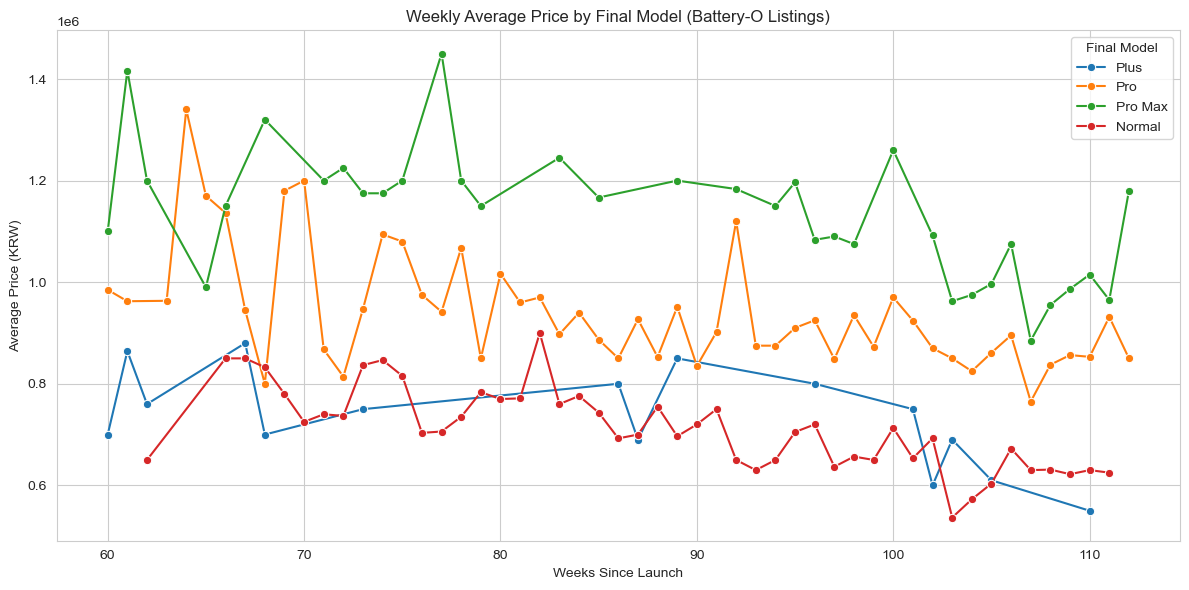

In [31]:
weekly_avg = (
    df_wb.groupby(['weeks_since_launch', 'final_model'])['price']
        .mean()
        .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=weekly_avg,
    x='weeks_since_launch',
    y='price',
    hue='final_model',
    marker='o'
)
plt.title('Weekly Average Price by Final Model (Battery-O Listings)')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Average Price (KRW)')
plt.legend(title='Final Model')
plt.tight_layout()
plt.show()


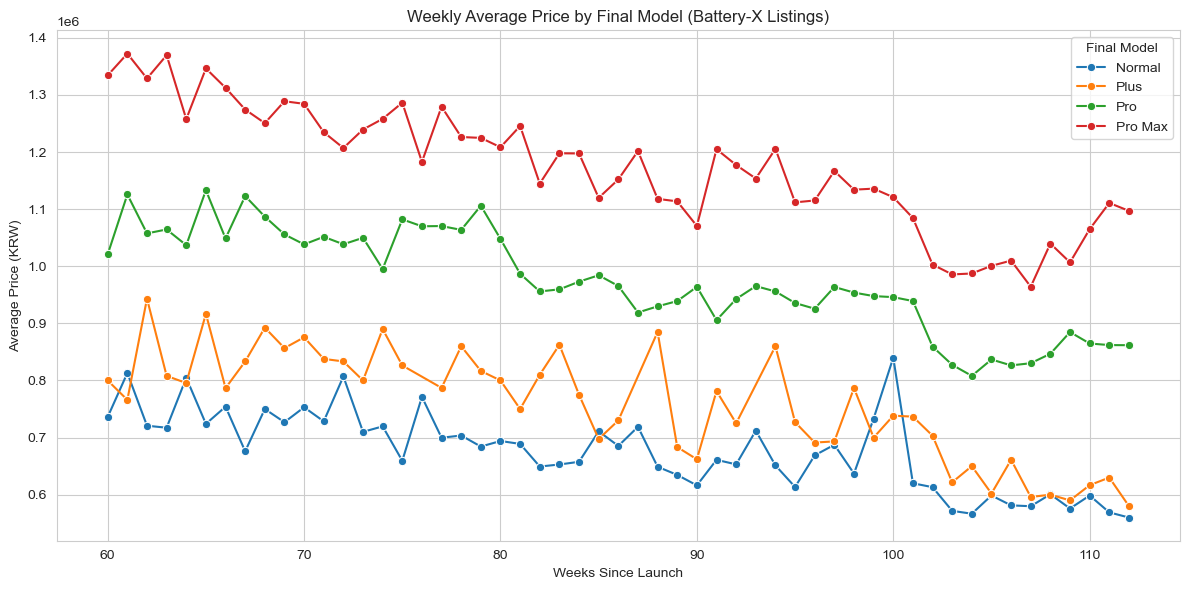

In [32]:
weekly_avg = (
    df_wob.groupby(['weeks_since_launch', 'final_model'])['price']
        .mean()
        .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=weekly_avg,
    x='weeks_since_launch',
    y='price',
    hue='final_model',
    marker='o'
)
plt.title('Weekly Average Price by Final Model (Battery-X Listings)')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Average Price (KRW)')
plt.legend(title='Final Model')
plt.tight_layout()
plt.show()


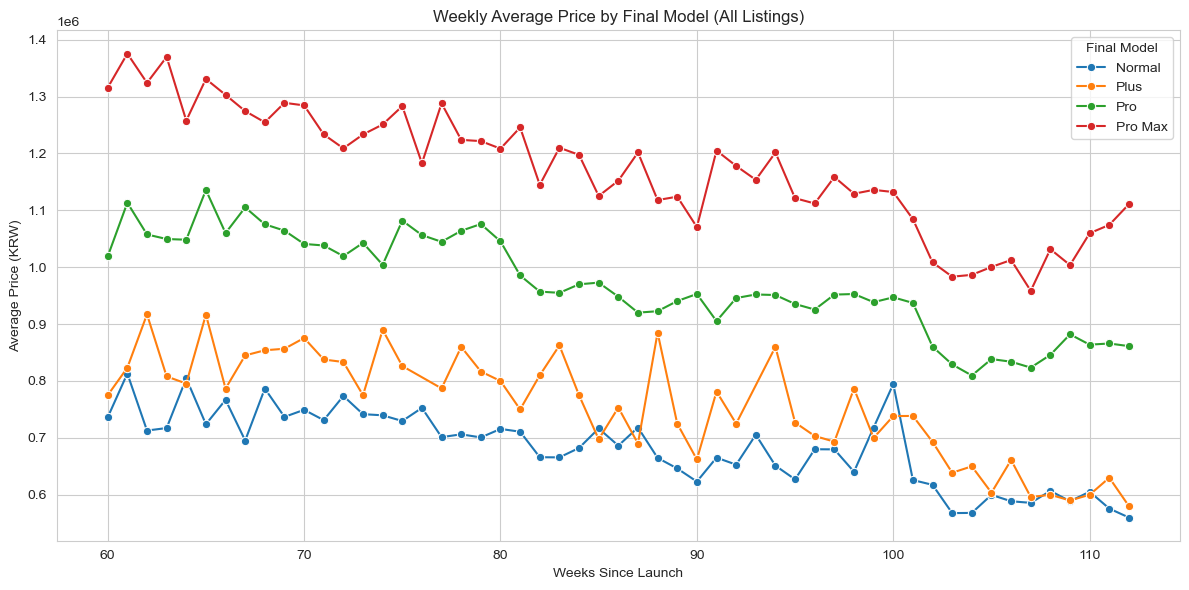

In [33]:
df_all = pd.concat([df_wb, df_wob], ignore_index=True)
weekly_avg_all = (
    df_all.groupby(['weeks_since_launch', 'final_model'])['price']
        .mean()
        .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=weekly_avg_all,
    x='weeks_since_launch',
    y='price',
    hue='final_model',
    marker='o'
)
plt.title('Weekly Average Price by Final Model (All Listings)')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Average Price (KRW)')
plt.legend(title='Final Model')
plt.tight_layout()
plt.show()


In [34]:
# Step 1: Baseline overview (df_all)
print("[Baseline Overview]")
print(f"Total rows: {len(df_all):,}")
print("Missing values (key columns):")
print(df_all[['price', 'weeks_since_launch', 'prompt_grade', 'final_model', 'battery_clean']].isnull().sum())
print("\nGrade distribution:")
print(df_all['prompt_grade'].value_counts())
print("\nModel distribution:")
print(df_all['final_model'].value_counts())


[Baseline Overview]
Total rows: 5,892
Missing values (key columns):
price                    0
weeks_since_launch       0
prompt_grade             0
final_model              0
battery_clean         5349
dtype: int64

Grade distribution:
prompt_grade
B    4848
A     950
S      57
C      37
Name: count, dtype: int64

Model distribution:
final_model
Pro        3262
Pro Max    1391
Normal      995
Plus        244
Name: count, dtype: int64


In [35]:
# Step 2: Time-based depreciation modeling
step2_df = df_all.copy()
step2_df['log_price'] = np.log(step2_df['price'])

simple_model = smf.ols('price ~ weeks_since_launch', data=step2_df).fit()
log_model = smf.ols('log_price ~ weeks_since_launch', data=step2_df).fit()
interaction_model = smf.ols(
    'price ~ weeks_since_launch * C(prompt_grade) + weeks_since_launch * C(final_model) + C(final_model)',
    data=step2_df
).fit()

print("[Simple Linear Model] price ~ weeks_since_launch")
print(simple_model.summary().tables[1])
print("\n[Log Price Model] log_price ~ weeks_since_launch")
print(log_model.summary().tables[1])
print("\n[Interaction Model] price ~ weeks_since_launch * grade + model")
print(interaction_model.summary().tables[1])


[Simple Linear Model] price ~ weeks_since_launch
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.441e+06   1.69e+04     85.020      0.000    1.41e+06    1.47e+06
weeks_since_launch -5608.5285    188.803    -29.706      0.000   -5978.652   -5238.405

[Log Price Model] log_price ~ weeks_since_launch
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.2418      0.018    779.485      0.000      14.206      14.278
weeks_since_launch    -0.0058      0.000    -28.548      0.000      -0.006      -0.005

[Interaction Model] price ~ weeks_since_launch * grade + model
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [36]:
# Step 2-2: Feature Importance Analysis (용량 포함)
# 용량 정보가 있는 데이터만 사용
step2_df_storage = df_all.dropna(subset=['final_storage'])

# 용량 포함 모델
full_model = smf.ols(
    'price ~ weeks_since_launch * C(prompt_grade) + weeks_since_launch * C(final_model) + C(final_model) + final_storage',
    data=step2_df_storage
).fit()

print("[Full Model] price ~ weeks_since_launch * grade + model + storage")
print(full_model.summary().tables[1])

print("\n" + "="*60)
print("[Feature Importance 분석 - 용량 포함 모델]")
print("="*60)

full_coefs = full_model.params

# 용량 효과
if 'final_storage' in full_coefs:
    storage_coef = full_coefs['final_storage']
    print(f"\n용량 (final_storage):")
    print(f"   - 1GB당 {storage_coef:,.0f}원")
    print(f"   - 128GB → 256GB: +{storage_coef * 128:,.0f}원")
    print(f"   - 256GB → 512GB: +{storage_coef * 256:,.0f}원")
    print(f"   - 512GB → 1TB: +{storage_coef * 512:,.0f}원")

# 등급별 효과 (기준: A급, 초기 가격)
print(f"\n등급별 가격 프리미엄 (A급 기준, 초기 가격):")
for grade in ['B', 'C', 'S']:
    key = f'C(prompt_grade)[T.{grade}]'
    if key in full_coefs:
        coef = full_coefs[key]
        print(f"   - {grade}급: {coef:+,.0f}원")

# 모델별 효과 (기준: Normal)
print(f"\n모델별 가격 프리미엄 (Normal 기준):")
for model in ['Plus', 'Pro', 'Pro Max']:
    key = f'C(final_model)[T.{model}]'
    if key in full_coefs:
        coef = full_coefs[key]
        print(f"   - {model}: +{coef:,.0f}원")

# Feature Importance 비교 (표준화된 계수)
print(f"\nFeature Impact 순위 (절대값 기준):")
feature_impacts = {}
if 'final_storage' in full_coefs:
    # 용량은 1GB당 효과이므로 256GB 기준으로 비교
    feature_impacts['Storage (256GB)'] = abs(full_coefs['final_storage'] * 256)
for grade in ['B', 'C', 'S']:
    key = f'C(prompt_grade)[T.{grade}]'
    if key in full_coefs:
        feature_impacts[f'Grade {grade}'] = abs(full_coefs[key])
for model in ['Plus', 'Pro', 'Pro Max']:
    key = f'C(final_model)[T.{model}]'
    if key in full_coefs:
        feature_impacts[f'Model {model}'] = abs(full_coefs[key])

sorted_impacts = sorted(feature_impacts.items(), key=lambda x: x[1], reverse=True)
for rank, (feature, impact) in enumerate(sorted_impacts[:10], 1):
    print(f"   {rank}. {feature}: {impact:,.0f}원")


[Full Model] price ~ weeks_since_launch * grade + model + storage
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     8.994e+05   3.09e+04     29.133      0.000    8.39e+05     9.6e+05
C(prompt_grade)[T.B]                          1.737e+04   2.45e+04      0.708      0.479   -3.07e+04    6.55e+04
C(prompt_grade)[T.C]                          1.607e+05   1.49e+05      1.077      0.282   -1.32e+05    4.53e+05
C(prompt_grade)[T.S]                          8.629e+04   8.74e+04      0.987      0.324   -8.51e+04    2.58e+05
C(final_model)[T.Plus]                        1.029e+05   4.76e+04      2.162      0.031    9579.772    1.96e+05
C(final_model)[T.Pro]                          3.66e+05   2.68e+04     13.637      0.000    3.13e+05    4.19e+05
C(final_model)[T.Pro Max]     

In [37]:
# Step 2 해석 요약
print("="*60)
print("[감가 패턴 해석 요약]")
print("="*60)
print("\n1. 전체 평균 감가율:")
print(f"   - 주당 약 {abs(simple_model.params['weeks_since_launch']):,.0f}원 하락")
print(f"   - 주당 약 {abs(log_model.params['weeks_since_launch'])*100:.2f}% 하락 (로그 모델)")

print("\n2. 등급별 감가 차이 (A급 기준):")
grade_coefs = interaction_model.params
for grade in ['B', 'C', 'S']:
    if f'weeks_since_launch:C(prompt_grade)[T.{grade}]' in grade_coefs:
        coef = grade_coefs[f'weeks_since_launch:C(prompt_grade)[T.{grade}]']
        print(f"   - {grade}급: 주당 {coef:+.0f}원 (A급 대비)")

print("\n3. 모델별 가격 프리미엄 (Normal 대비):")
for model in ['Plus', 'Pro', 'Pro Max']:
    if f'C(final_model)[T.{model}]' in grade_coefs:
        coef = grade_coefs[f'C(final_model)[T.{model}]']
        print(f"   - {model}: +{coef:,.0f}원")


[감가 패턴 해석 요약]

1. 전체 평균 감가율:
   - 주당 약 5,609원 하락
   - 주당 약 0.58% 하락 (로그 모델)

2. 등급별 감가 차이 (A급 기준):
   - B급: 주당 -1671원 (A급 대비)
   - C급: 주당 -3768원 (A급 대비)
   - S급: 주당 +2234원 (A급 대비)

3. 모델별 가격 프리미엄 (Normal 대비):
   - Plus: +107,452원
   - Pro: +401,313원
   - Pro Max: +747,704원


In [38]:
# Step 7: Analysis by Grade (ANOVA / Regression) - 모델별 분리 분석
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("="*60)
print("[Step 7: 등급별 가격 차이 분석 - 모델별 분리]")
print("="*60)

# 용량 정보가 있는 데이터만 사용
# Filter to Pro model only (largest sample)
df_pro = df_all[df_all['final_model'] == 'Pro'].copy()
print(f"Pro model samples: {len(df_pro)} rows")

# Use Pro model data only
regression_df = df_pro.dropna(subset=['final_storage']).copy()

# Analyze Pro model only
models_list = ['Pro']  # Focus on Pro model only
grade_labels = ['S', 'A', 'B', 'C']

# 각 모델별로 등급 효과 분석
for model in models_list:
    model_data = regression_df[regression_df['final_model'] == model].copy()
    
    if len(model_data) < 20:  # 최소 샘플 수 체크
        continue
    
    print(f"\n{'='*60}")
    print(f"[{model} 모델별 등급 효과 분석]")
    print(f"{'='*60}")
    print(f"샘플 수: {len(model_data)}개")
    
    # 7-1. One-way ANOVA: 등급별 가격 차이 검증
    grade_groups = [model_data[model_data['prompt_grade'] == g]['price'].values for g in grade_labels]
    
    # 최소 2개 그룹 이상 있어야 ANOVA 가능
    valid_groups = [(g, label) for g, label in zip(grade_groups, grade_labels) if len(g) >= 2]
    
    if len(valid_groups) >= 2:
        groups_only = [g for g, _ in valid_groups]
        f_stat, p_value = f_oneway(*groups_only)
        
        print(f"\n[ANOVA 결과]")
        print(f"F-statistic: {f_stat:.2f}")
        print(f"P-value: {p_value:.2e}")
        print(f"결과: 등급별 가격 차이는 {'유의미함' if p_value < 0.05 else '유의미하지 않음'} (p < 0.05)")
        
        # 등급별 통계 요약
        print("\n[등급별 가격 통계]")
        for grade, group in zip(grade_labels, grade_groups):
            if len(group) > 0:
                print(f"  {grade}급: 평균={np.mean(group):,.0f}원, 표준편차={np.std(group):,.0f}원, n={len(group)}")
        
        # 7-2. Post-hoc 테스트 (Tukey HSD) - 최소 2개 그룹 이상
        if len(valid_groups) >= 2:
            print("\n[Post-hoc Test (Tukey HSD)]")
            anova_data = []
            for grade, group in zip(grade_labels, grade_groups):
                if len(group) >= 2:
                    for price in group:
                        anova_data.append({'grade': grade, 'price': price})
            
            if len(anova_data) > 0:
                anova_df = pd.DataFrame(anova_data)
                if len(anova_df['grade'].unique()) >= 2:
                    tukey_result = pairwise_tukeyhsd(
                        endog=anova_df['price'],
                        groups=anova_df['grade'],
                        alpha=0.05
                    )
                    print(tukey_result)
    
    # 7-3. 다변량 회귀 모델 (용량, 시간 통제)
    print(f"\n[다변량 회귀 모델 - 용량, 시간 통제]")
    model_regression = smf.ols(
        'price ~ C(prompt_grade) + final_storage + weeks_since_launch',
        data=model_data
    ).fit()
    
    print(f"R²: {model_regression.rsquared:.3f}")
    print(f"조정된 R²: {model_regression.rsquared_adj:.3f}")
    
    # 등급별 효과 추출 (A급 기준)
    print("\n[등급별 가격 효과 (A급 기준, 용량/시간 통제)]")
    model_coefs = model_regression.params
    for grade in ['B', 'C', 'S']:
        key = f'C(prompt_grade)[T.{grade}]'
        if key in model_coefs:
            coef = model_coefs[key]
            pval = model_regression.pvalues[key]
            sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
            print(f"  {grade}급: {coef:+,.0f}원 {sig} (p={pval:.4f})")
    
    # 용량, 시간 효과
    print("\n[다른 요인들의 효과]")
    if 'final_storage' in model_coefs:
        storage_coef = model_coefs['final_storage']
        storage_pval = model_regression.pvalues['final_storage']
        sig = "***" if storage_pval < 0.001 else "**" if storage_pval < 0.01 else "*" if storage_pval < 0.05 else "ns"
        print(f"  용량 (1GB당): +{storage_coef:,.0f}원 {sig}")
    if 'weeks_since_launch' in model_coefs:
        time_coef = model_coefs['weeks_since_launch']
        time_pval = model_regression.pvalues['weeks_since_launch']
        sig = "***" if time_pval < 0.001 else "**" if time_pval < 0.01 else "*" if time_pval < 0.05 else "ns"
        print(f"  시간 (주당): {time_coef:,.0f}원 {sig}")

print(f"\n{'='*60}")
print("[종합 요약]")
print(f"{'='*60}")
print("각 모델별로 등급 효과를 분리 분석하여 모델 간 차이를 제거하고")
print("순수한 등급 효과만 확인할 수 있음")
print(f"{'='*60}")


[Step 7: 등급별 가격 차이 분석 - 모델별 분리]
Pro model samples: 3262 rows

[Pro 모델별 등급 효과 분석]
샘플 수: 3037개

[ANOVA 결과]
F-statistic: 43.13
P-value: 2.75e-27
결과: 등급별 가격 차이는 유의미함 (p < 0.05)

[등급별 가격 통계]
  S급: 평균=1,263,125원, 표준편차=194,413원, n=16
  A급: 평균=1,003,034원, 표준편차=165,150원, n=444
  B급: 평균=943,642원, 표준편차=177,815원, n=2564
  C급: 평균=657,692원, 표준편차=118,332원, n=13

[Post-hoc Test (Tukey HSD)]
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
     A      B  -59392.2296   0.0  -82648.8996  -36135.5595   True
     A      C -345341.9265   0.0 -472649.4443 -218034.4088   True
     A      S  260090.7658   0.0  144961.2837  375220.2479   True
     B      C  -285949.697   0.0 -411751.1433 -160148.2507   True
     B      S  319482.9953   0.0  206021.1186   432944.872   True
     C      S  605432.6923   0.0  436495.0445  774370.3401   True
----------------------------

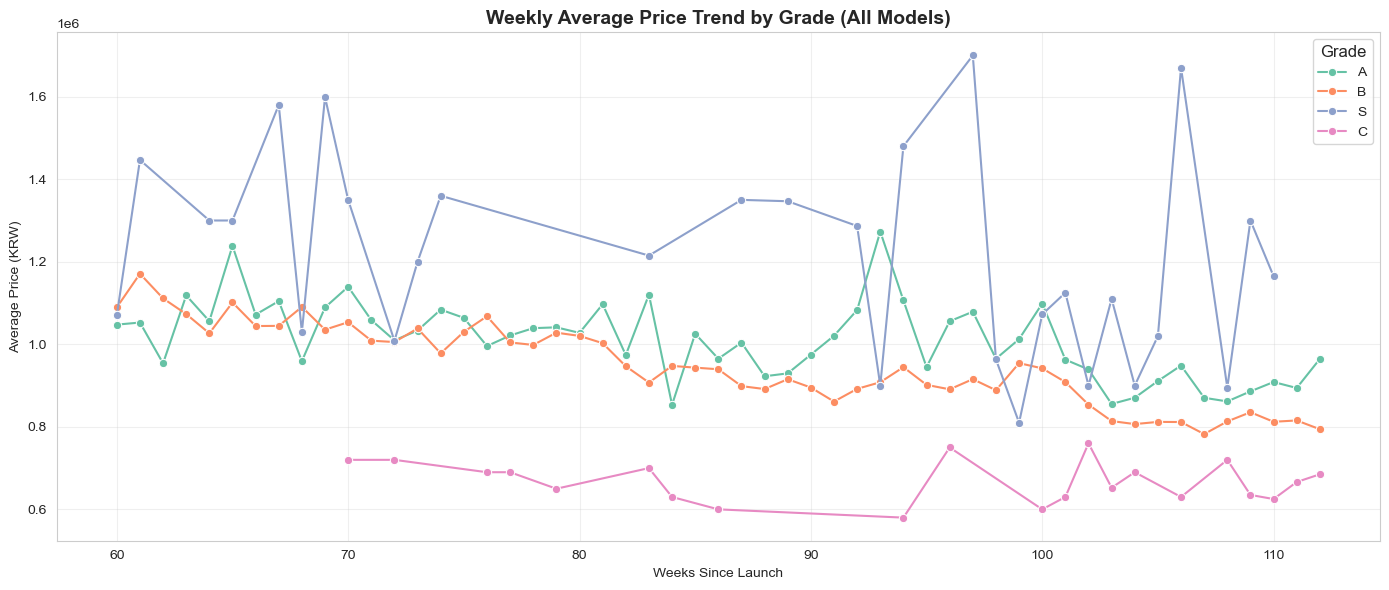

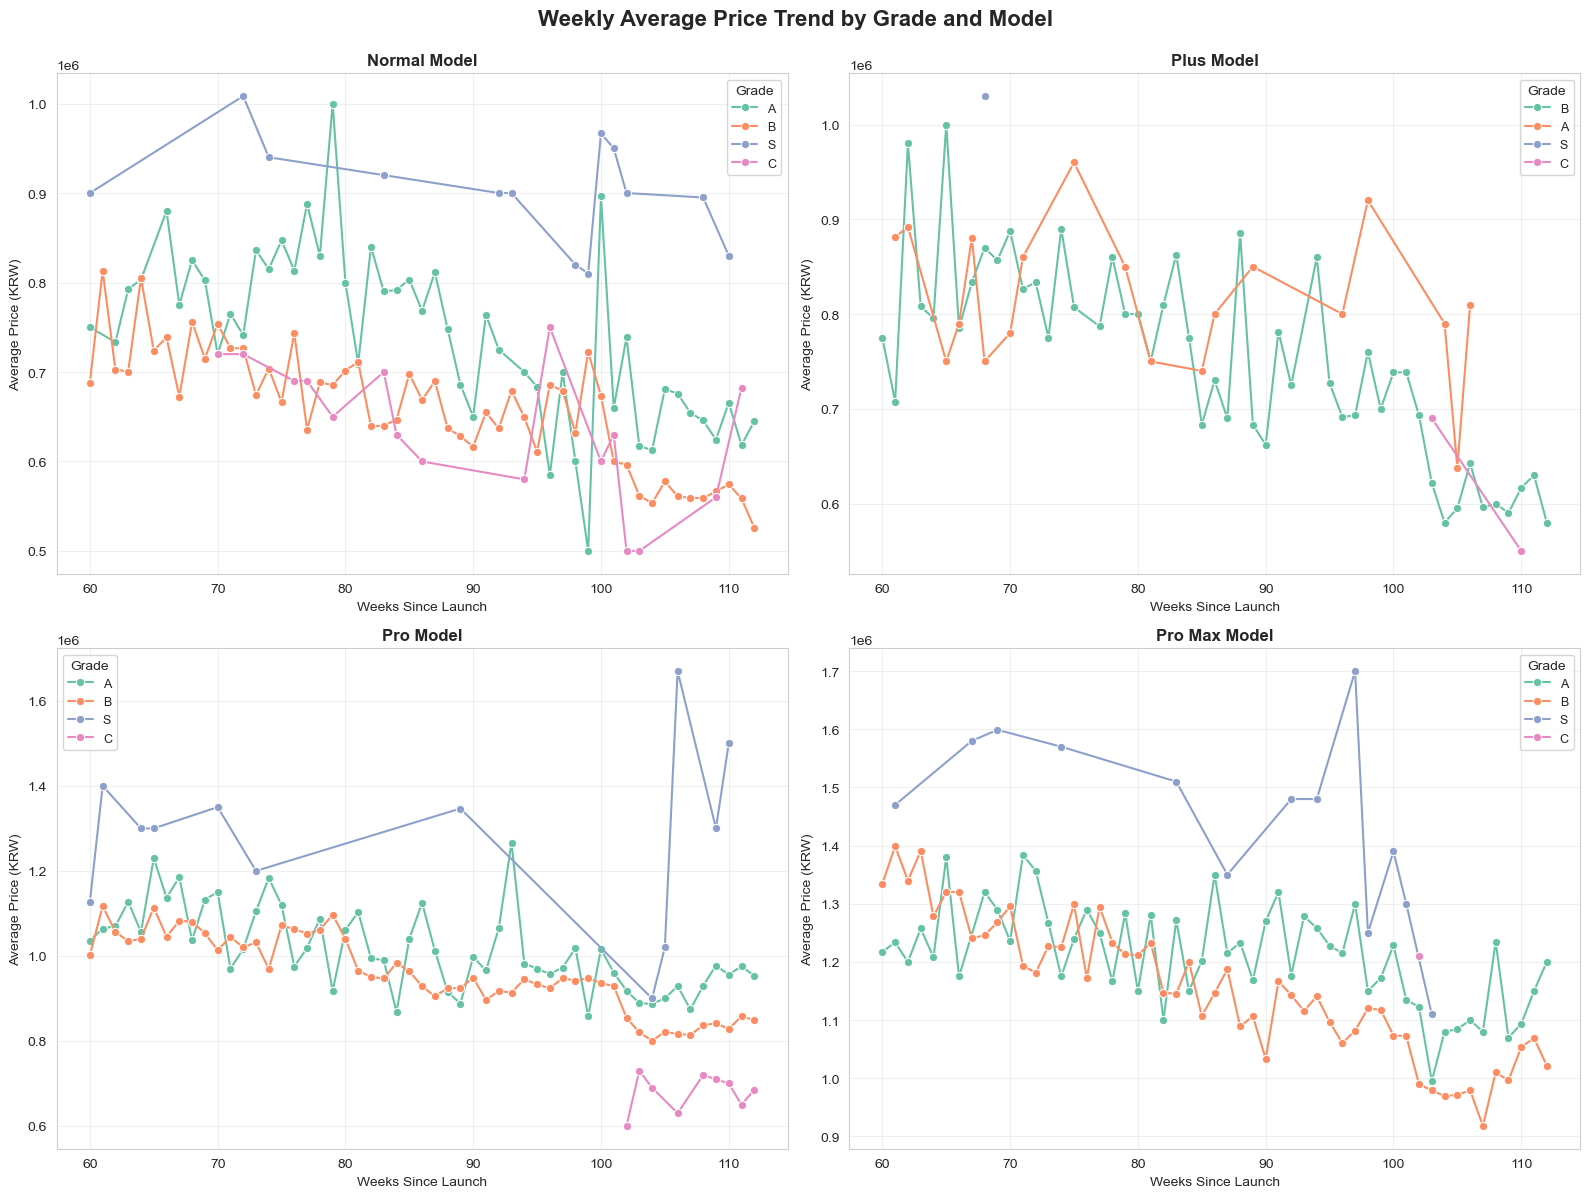

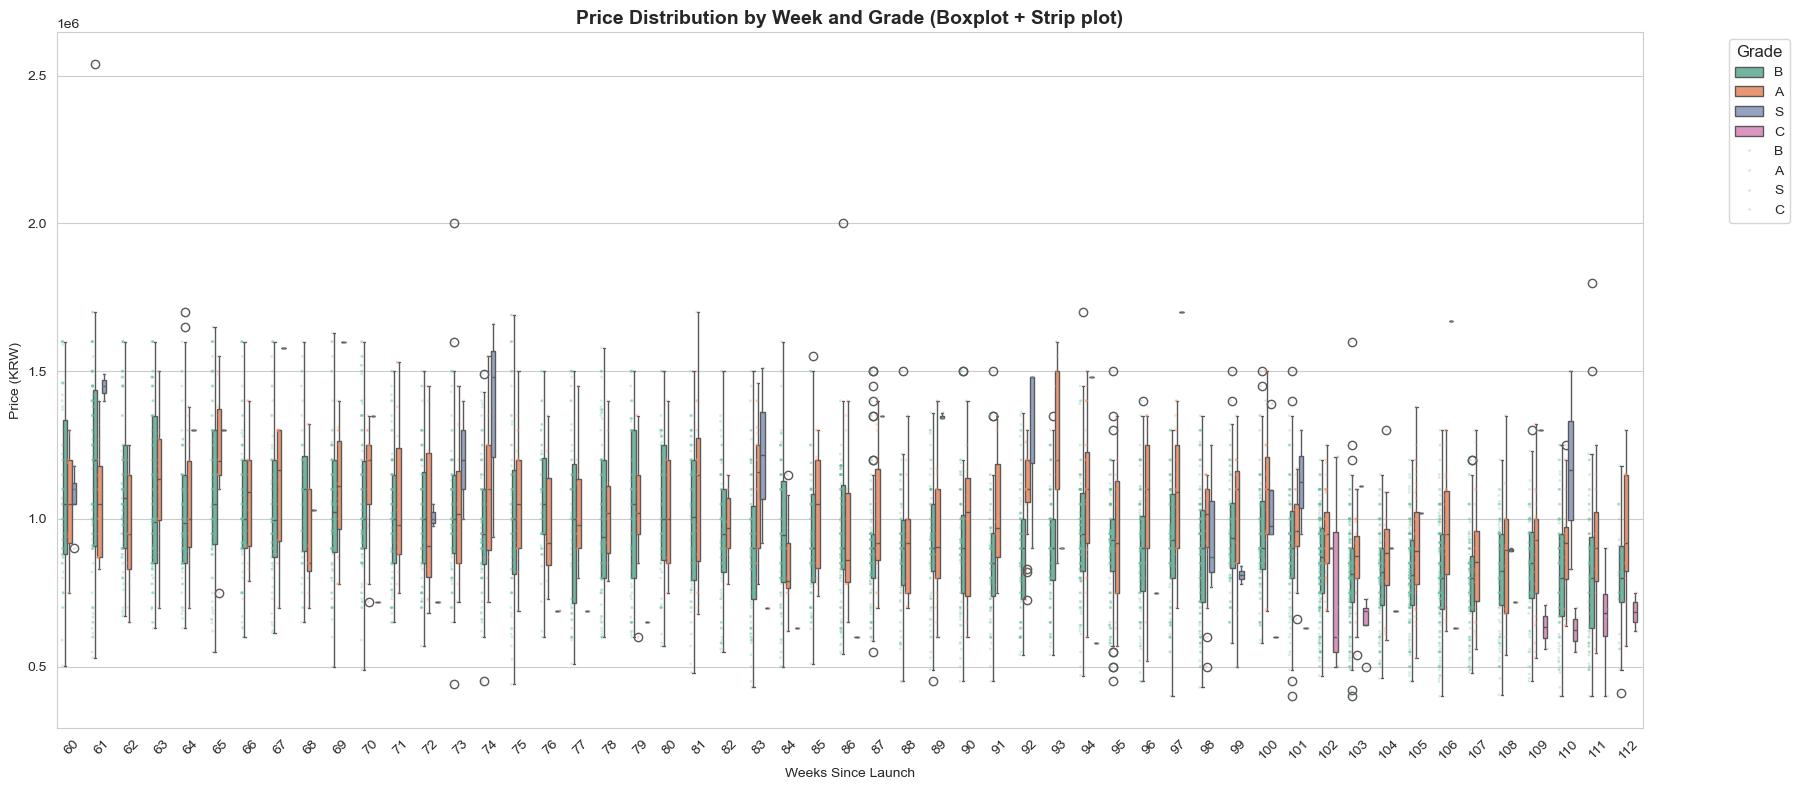

[Outlier 데이터 요약]
총 72개의 outlier 발견

등급별 분포:
prompt_grade
B    56
A    13
S     2
C     1
Name: count, dtype: int64

모델별 분포:
final_model
Pro Max    33
Normal     21
Pro        17
Plus        1
Name: count, dtype: int64

주차별 분포:
weeks_since_launch
60     1
61     1
64     2
65     1
70     1
73     3
74     2
79     1
84     1
85     1
86     1
87     9
88     1
89     1
90     2
91     3
92     3
93     1
94     1
95     8
96     1
98     2
99     2
100    3
101    5
103    7
104    1
107    2
109    1
110    1
111    2
112    1
Name: count, dtype: int64

[Outlier 데이터 상세]
    weeks_since_launch prompt_grade final_model    price                                    title
0                   60            S      Normal   900000                   아이폰15 128기가 블랙 미개봉 새상품
1                   61            B      Normal  2540000                                  아이폰15맥스
2                   64            B         Pro  1650000      아이폰 15promax 화이트티타늄 1TB 애케플O (내년까지)
3                   64        

In [39]:
# Step 3: Grade-specific depreciation comparison
from scipy import stats

# 3-1. 등급별 주차별 평균 가격 추이 (전체)
grade_weekly = (
    df_all.groupby(['weeks_since_launch', 'prompt_grade'])['price']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=grade_weekly,
    x='weeks_since_launch',
    y='price',
    hue='prompt_grade',
    marker='o',
    palette='Set2'
)
plt.title('Weekly Average Price Trend by Grade (All Models)', fontsize=14, fontweight='bold')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Average Price (KRW)')
plt.legend(title='Grade', title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3-1-2. 기기별 등급별 주차별 평균 가격 추이
models = sorted(df_all['final_model'].unique())
n_models = len(models)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, model in enumerate(models):
    model_data = df_all[df_all['final_model'] == model]
    grade_weekly_model = (
        model_data.groupby(['weeks_since_launch', 'prompt_grade'])['price']
        .mean()
        .reset_index()
    )
    
    sns.lineplot(
        data=grade_weekly_model,
        x='weeks_since_launch',
        y='price',
        hue='prompt_grade',
        marker='o',
        palette='Set2',
        ax=axes[idx]
    )
    axes[idx].set_title(f'{model} Model', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Weeks Since Launch')
    axes[idx].set_ylabel('Average Price (KRW)')
    axes[idx].legend(title='Grade', title_fontsize=10, fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Weekly Average Price Trend by Grade and Model', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# 3-1-3. 주차별 가격 분포 (Boxplot + Strip plot)
plt.figure(figsize=(18, 8))
# 주차별로 샘플이 많은 주차만 선택 (최소 5개 이상)
week_counts = df_all.groupby('weeks_since_launch').size()
valid_weeks = week_counts[week_counts >= 5].index
df_filtered = df_all[df_all['weeks_since_launch'].isin(valid_weeks)]

# 주차별로 등급별 boxplot
sns.boxplot(
    data=df_filtered,
    x='weeks_since_launch',
    y='price',
    hue='prompt_grade',
    palette='Set2',
    width=0.6
)

# Strip plot으로 개별 데이터 포인트 추가
sns.stripplot(
    data=df_filtered,
    x='weeks_since_launch',
    y='price',
    hue='prompt_grade',
    palette='Set2',
    dodge=True,
    alpha=0.3,
    size=2
)

plt.title('Price Distribution by Week and Grade (Boxplot + Strip plot)', fontsize=14, fontweight='bold')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Price (KRW)')
plt.legend(title='Grade', title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3-1-4. Outlier 데이터 추출 (IQR 방법)
def get_outliers_iqr(group):
    """IQR 방법으로 outlier 찾기"""
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (group < lower_bound) | (group > upper_bound)

outliers_list = []
for week in valid_weeks:
    week_data = df_filtered[df_filtered['weeks_since_launch'] == week]
    for grade in week_data['prompt_grade'].unique():
        grade_week_data = week_data[week_data['prompt_grade'] == grade]
        if len(grade_week_data) >= 4:  # 최소 4개 이상 있어야 IQR 계산 가능
            is_outlier = get_outliers_iqr(grade_week_data['price'])
            outliers = grade_week_data[is_outlier]
            if len(outliers) > 0:
                outliers_list.append(outliers)

if outliers_list:
    df_outliers = pd.concat(outliers_list, ignore_index=True)
    print(f"[Outlier 데이터 요약]")
    print(f"총 {len(df_outliers)}개의 outlier 발견")
    print(f"\n등급별 분포:")
    print(df_outliers['prompt_grade'].value_counts())
    print(f"\n모델별 분포:")
    print(df_outliers['final_model'].value_counts())
    print(f"\n주차별 분포:")
    print(df_outliers['weeks_since_launch'].value_counts().sort_index())
    print(f"\n[Outlier 데이터 상세]")
    print(df_outliers[['weeks_since_launch', 'prompt_grade', 'final_model', 'price', 'title']].to_string())
    
    # CSV로 저장
    df_outliers.to_csv('iphone15_outliers.csv', index=False, encoding='utf-8-sig')
    print(f"\nOutlier 데이터가 'iphone15_outliers.csv'로 저장되었습니다.")
else:
    print("Outlier가 발견되지 않았습니다.")


In [40]:
# Step 4: Price Strategy Simulation

# 4-1. 예상 가격 계산 함수
def predict_price(weeks_since_launch, grade='B', model='Normal', base_model=interaction_model):
    """특정 시점의 예상 가격 계산"""
    # 기본 intercept
    price = base_model.params['Intercept']
    
    # 등급 효과
    if grade != 'A':
        grade_key = f"C(prompt_grade)[T.{grade}]"
        if grade_key in base_model.params:
            price += base_model.params[grade_key]
    
    # 모델 효과
    if model != 'Normal':
        model_key = f"C(final_model)[T.{model}]"
        if model_key in base_model.params:
            price += base_model.params[model_key]
    
    # 시간 효과 (기본)
    price += base_model.params['weeks_since_launch'] * weeks_since_launch
    
    # 등급별 시간 상호작용
    if grade != 'A':
        interaction_key = f"weeks_since_launch:C(prompt_grade)[T.{grade}]"
        if interaction_key in base_model.params:
            price += base_model.params[interaction_key] * weeks_since_launch
    
    # 모델별 시간 상호작용
    if model != 'Normal':
        model_interaction_key = f"weeks_since_launch:C(final_model)[T.{model}]"
        if model_interaction_key in base_model.params:
            price += base_model.params[model_interaction_key] * weeks_since_launch
    
    return max(price, 0)  # 음수 방지

# 4-2. N주 후 예상 가격 시뮬레이션
def simulate_holding_period(start_week, holding_weeks, grade='B', model='Normal'):
    """매입 후 N주 보유 시 예상 가격 변화"""
    buy_price = predict_price(start_week, grade, model)
    sell_price = predict_price(start_week + holding_weeks, grade, model)
    
    return {
        'buy_price': buy_price,
        'sell_price': sell_price,
        'loss': sell_price - buy_price,
        'loss_pct': ((sell_price - buy_price) / buy_price) * 100,
        'holding_weeks': holding_weeks
    }

print("[가격 예측 함수 정의 완료]")


[가격 예측 함수 정의 완료]


[Feature Engineering 시각화 자료]


/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/2394102134.py:58: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/2394102134.py:58: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/2394102134.py:58: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/2394102134.py:58: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/2394102134.py:59: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.
  plt.savefig('feature_engineering_overview.png', dpi=300, bbox_inches='tight')
/var/folders/5m/rywy7zrx7nbgk

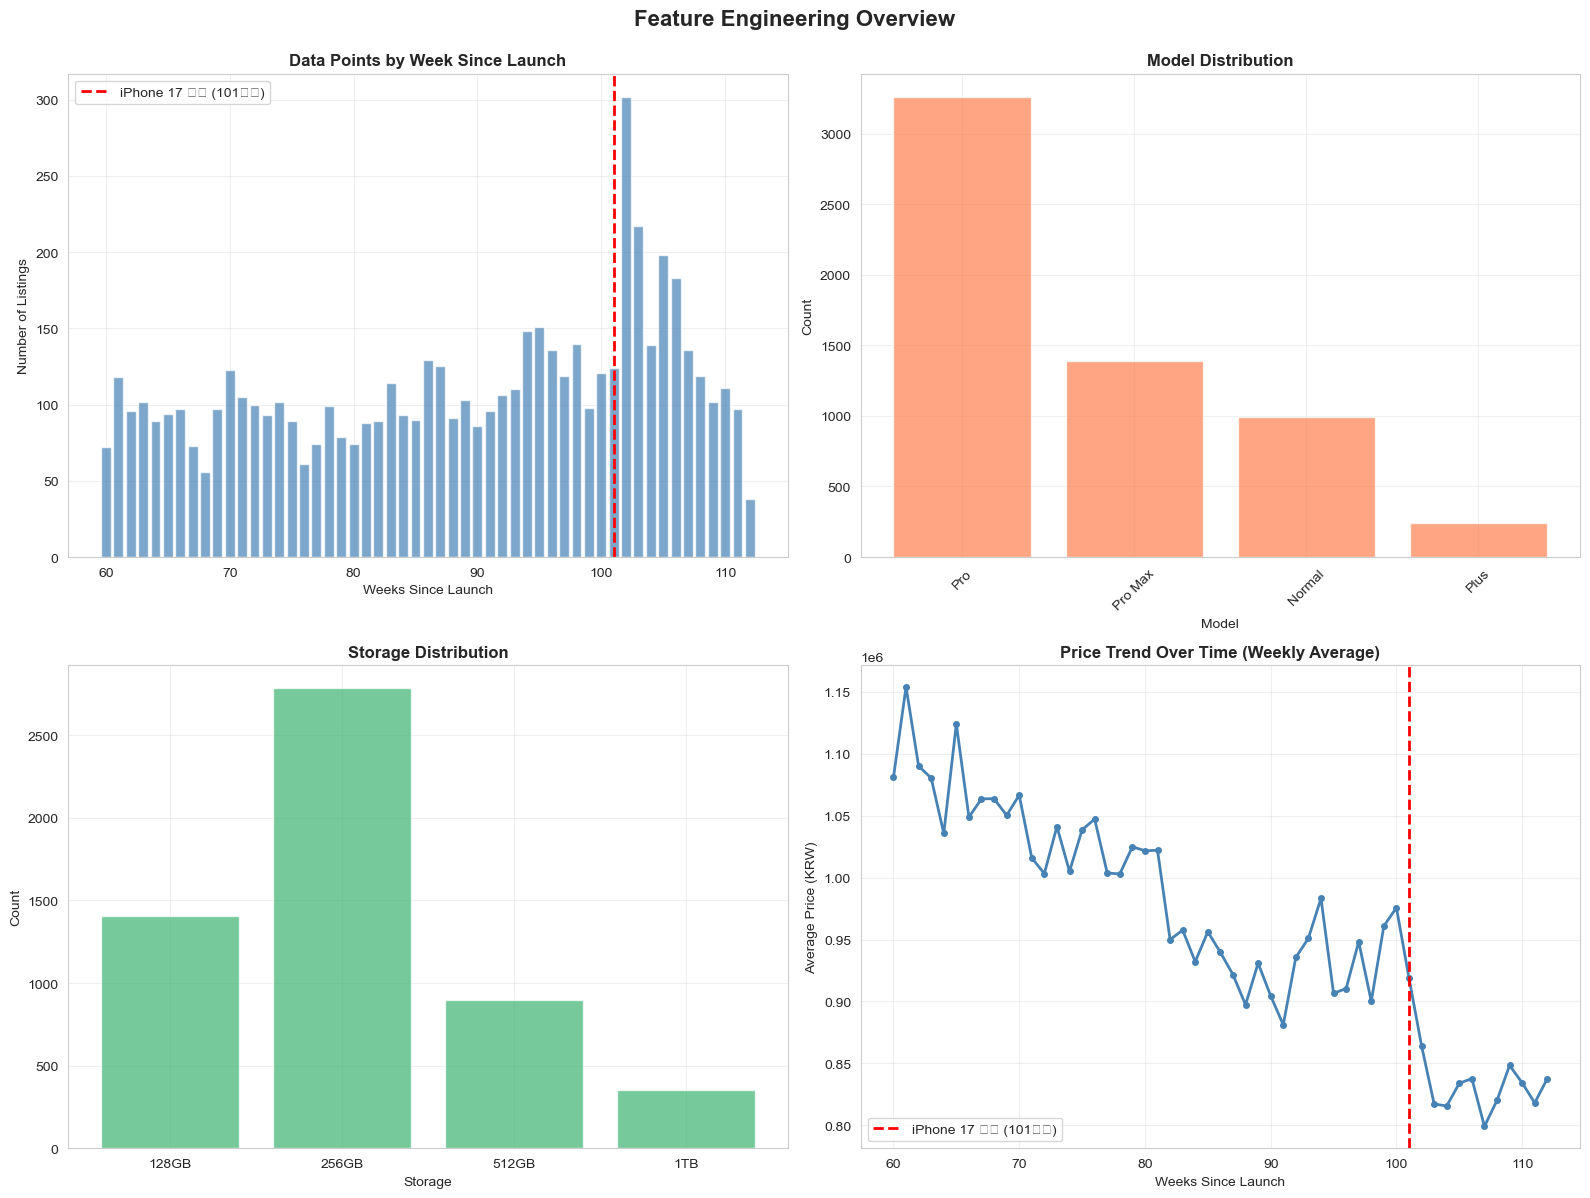

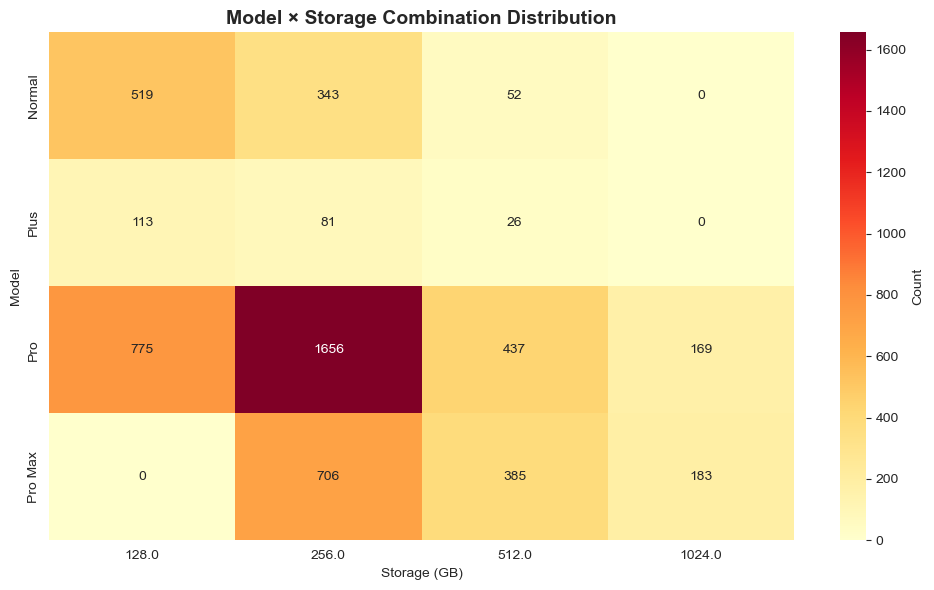

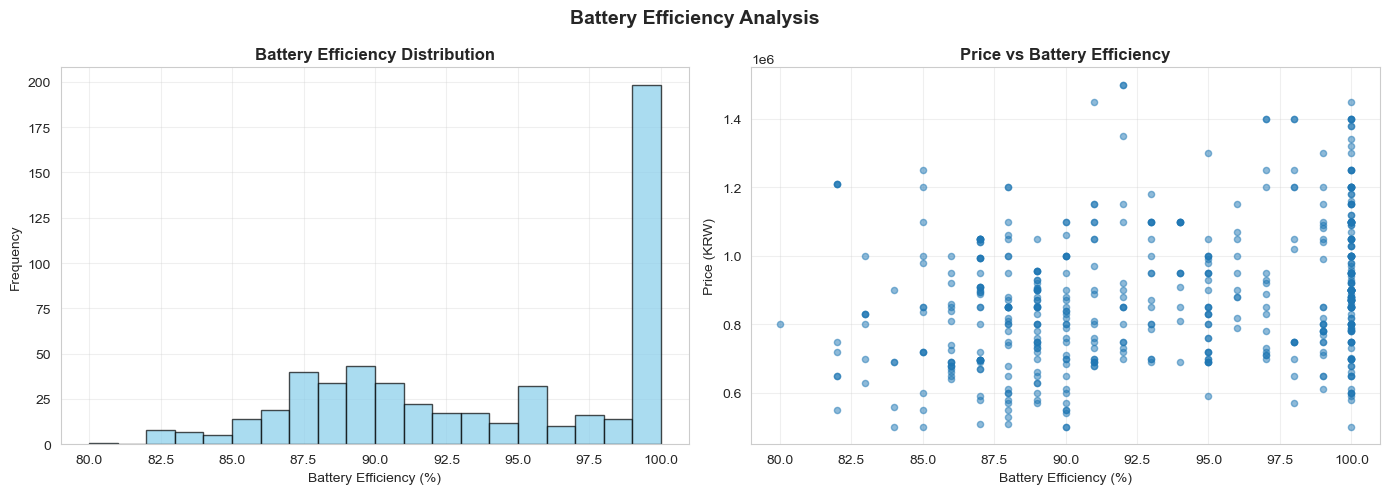


모든 시각화 자료가 저장되었습니다!
  - feature_engineering_overview.png
  - model_storage_heatmap.png
  - battery_analysis.png


In [41]:
# Feature Engineering 시각화 자료 생성
print("="*60)
print("[Feature Engineering 시각화 자료]")
print("="*60)

# iPhone 17 출시일 계산 (2025-09-19)
from datetime import datetime
iphone15_launch = datetime(2023, 10, 13)
iphone17_launch = datetime(2025, 9, 19)
iphone17_weeks = (iphone17_launch - iphone15_launch).days // 7

# 1. 시간 변수 분포 (weeks_since_launch)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1-1. 주차별 데이터 포인트 수 (iPhone 17 출시일 강조)
week_counts = df_all.groupby('weeks_since_launch').size().reset_index()
week_counts.columns = ['weeks_since_launch', 'count']

axes[0, 0].bar(week_counts['weeks_since_launch'], week_counts['count'], alpha=0.7, color='steelblue')
# iPhone 17 출시일 수직선 추가
axes[0, 0].axvline(x=iphone17_weeks, color='red', linestyle='--', linewidth=2, label=f'iPhone 17 출시 ({iphone17_weeks}주차)')
axes[0, 0].set_title('Data Points by Week Since Launch', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Weeks Since Launch')
axes[0, 0].set_ylabel('Number of Listings')
axes[0, 0].legend(loc='best')
axes[0, 0].grid(True, alpha=0.3)

# 1-2. 모델별 분포 (Bar Chart) - 등급 대신 모델로 대체
model_counts = df_all['final_model'].value_counts()
axes[0, 1].bar(model_counts.index, model_counts.values, color='coral', alpha=0.7)
axes[0, 1].set_title('Model Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 1-3. 용량별 분포 (Bar Chart)
storage_counts = df_all['final_storage'].value_counts().sort_index()
axes[1, 0].bar([f'{int(s)}GB' if s < 1024 else '1TB' for s in storage_counts.index], 
                storage_counts.values, color='mediumseagreen', alpha=0.7)
axes[1, 0].set_title('Storage Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Storage')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3)

# 1-4. 주차별 평균 가격 추이 (iPhone 17 출시일 강조)
weekly_avg = df_all.groupby('weeks_since_launch')['price'].mean().reset_index()
axes[1, 1].plot(weekly_avg['weeks_since_launch'], weekly_avg['price'], marker='o', linewidth=2, markersize=4, color='steelblue')
# iPhone 17 출시일 수직선 추가
axes[1, 1].axvline(x=iphone17_weeks, color='red', linestyle='--', linewidth=2, label=f'iPhone 17 출시 ({iphone17_weeks}주차)')
axes[1, 1].set_title('Price Trend Over Time (Weekly Average)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Weeks Since Launch')
axes[1, 1].set_ylabel('Average Price (KRW)')
axes[1, 1].legend(loc='best')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Feature Engineering Overview', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('feature_engineering_overview.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 모델 × 용량 조합 히트맵
model_storage = df_all.groupby(['final_model', 'final_storage']).size().reset_index()
model_storage.columns = ['model', 'storage', 'count']
heatmap_data = model_storage.pivot(index='model', columns='storage', values='count')
heatmap_data = heatmap_data.reindex(['Normal', 'Plus', 'Pro', 'Pro Max'])

# 128, 256, 512, 1024 컬럼만 선택 (존재하는 것만)
available_cols = [col for col in [128, 256, 512, 1024] if col in heatmap_data.columns]
heatmap_data = heatmap_data[available_cols]

# NaN을 0으로 채우기
heatmap_data = heatmap_data.fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Model × Storage Combination Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Storage (GB)')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig('model_storage_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 배터리 효율 분포 (있는 경우만)
battery_df = df_all.dropna(subset=['battery_clean'])
if len(battery_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 히스토그램
    axes[0].hist(battery_df['battery_clean'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    axes[0].set_title('Battery Efficiency Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Battery Efficiency (%)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True, alpha=0.3)
    
    # 배터리 vs 가격 산점도
    axes[1].scatter(battery_df['battery_clean'], battery_df['price'], alpha=0.5, s=20)
    axes[1].set_title('Price vs Battery Efficiency', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Battery Efficiency (%)')
    axes[1].set_ylabel('Price (KRW)')
    axes[1].grid(True, alpha=0.3)
    
    plt.suptitle('Battery Efficiency Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('battery_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n모든 시각화 자료가 저장되었습니다!")
print("  - feature_engineering_overview.png")
print("  - model_storage_heatmap.png")
if len(battery_df) > 0:
    print("  - battery_analysis.png")


In [42]:
# 4-3. 시나리오 시뮬레이션
scenarios = []
for grade in ['S', 'A', 'B']:
    for model in ['Normal', 'Pro', 'Pro Max']:
        result = simulate_holding_period(start_week=50, holding_weeks=26, grade=grade, model=model)
        result['grade'] = grade
        result['model'] = model
        scenarios.append(result)

scenario_df = pd.DataFrame(scenarios)
print("[시나리오: 50주차 매입 → 26주(약 6개월) 보유 후 매도]")
print(scenario_df[['grade', 'model', 'buy_price', 'sell_price', 'loss', 'loss_pct']].round(0))


[시나리오: 50주차 매입 → 26주(약 6개월) 보유 후 매도]
  grade    model  buy_price  sell_price      loss  loss_pct
0     S   Normal   957257.0    949751.0   -7506.0      -1.0
1     S      Pro  1293074.0   1251511.0  -41563.0      -3.0
2     S  Pro Max  1553726.0   1467578.0  -86148.0      -6.0
3     A   Normal   824458.0    758880.0  -65578.0      -8.0
4     A      Pro  1160276.0   1060641.0  -99635.0      -9.0
5     A  Pro Max  1420928.0   1276708.0 -144220.0     -10.0
6     B   Normal   816799.0    707772.0 -109027.0     -13.0
7     B      Pro  1152616.0   1009532.0 -143084.0     -12.0
8     B  Pro Max  1413268.0   1225599.0 -187669.0     -13.0


/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/760255172.py:19: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/760255172.py:19: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/760255172.py:19: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/760255172.py:19: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) Arial.
  plt.tight_layout()
/Users/miin/miniconda3/envs/dsp/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miin/miniconda3/envs/dsp/lib/python3.11/site-packages/I

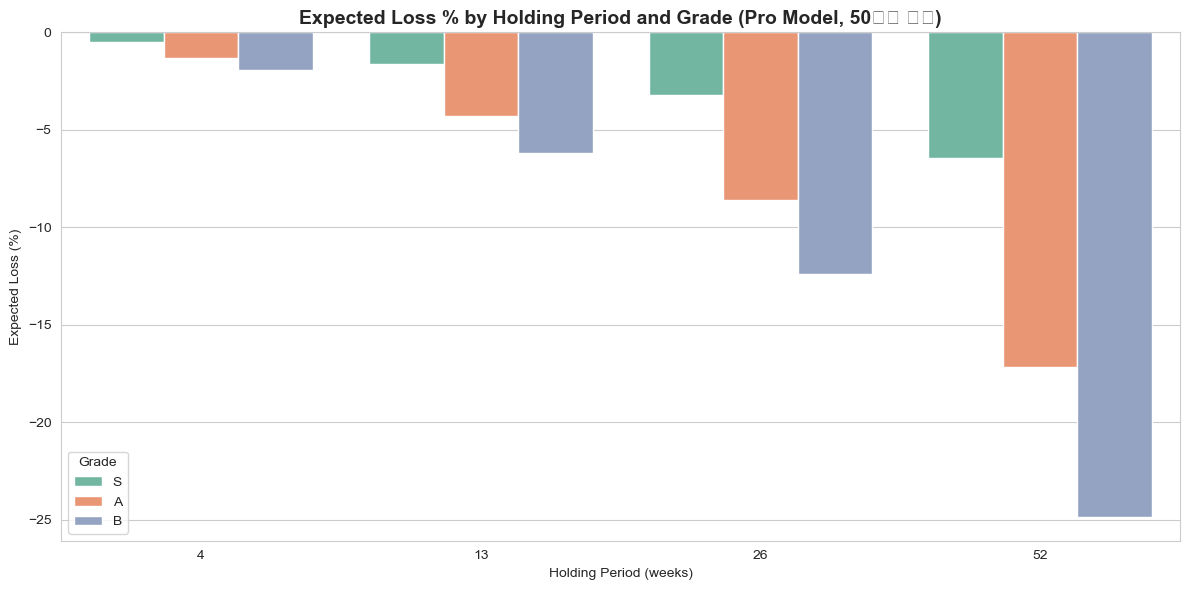

In [43]:
# 4-4. 보유 기간별 손실 시각화
holding_periods = [4, 13, 26, 52]  # 1개월, 3개월, 6개월, 1년
sim_results = []

for grade in ['S', 'A', 'B']:
    for weeks in holding_periods:
        result = simulate_holding_period(50, weeks, grade=grade, model='Pro')
        result['grade'] = grade
        sim_results.append(result)

sim_df = pd.DataFrame(sim_results)

plt.figure(figsize=(12, 6))
sns.barplot(data=sim_df, x='holding_weeks', y='loss_pct', hue='grade', palette='Set2')
plt.title('Expected Loss % by Holding Period and Grade (Pro Model, 50주차 매입)', fontsize=14, fontweight='bold')
plt.xlabel('Holding Period (weeks)')
plt.ylabel('Expected Loss (%)')
plt.legend(title='Grade')
plt.tight_layout()
plt.show()


[마크다운 전략 시뮬레이션 - Monte Carlo (1000회 반복)]

No Markdown:
  평균 판매일: 12.9일 (표준편차: 9.0일)
  중앙값 판매일: 11.0일
  평균 판매가: 1,000,000원

5일마다 -3%:
  평균 판매일: 12.6일 (표준편차: 8.7일)
  중앙값 판매일: 10.0일
  평균 판매가: 938,961원

7일마다 -5%:
  평균 판매일: 12.6일 (표준편차: 8.9일)
  중앙값 판매일: 10.0일
  평균 판매가: 933,365원

Aggressive (3일마다 -2%):
  평균 판매일: 12.3일 (표준편차: 8.5일)
  중앙값 판매일: 10.0일
  평균 판매가: 928,024원


/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/89089783.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=strategy_df, x='strategy', y='avg_days', ax=axes[0], palette='Set2')
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/89089783.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=strategy_df, x='strategy', y='avg_price', ax=axes[1], palette='Set2')
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/89089783.py:113: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/89089783.py:113: UserWarning: Glyph 47560 (\N{H

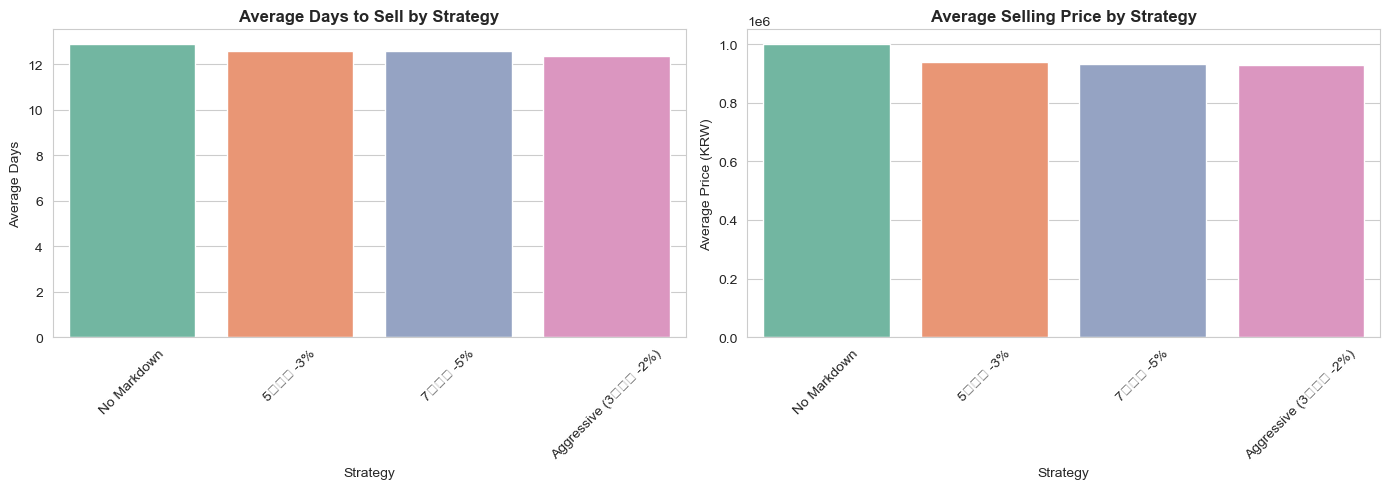


[판매 시간 단축 효과 (기본 전략 대비)]
  5일마다 -3%: 2.4% 단축
  7일마다 -5%: 2.4% 단축
  Aggressive (3일마다 -2%): 4.1% 단축


In [44]:
# Step 4-5: Markdown Strategy Simulation
import numpy as np
from scipy.stats import norm

def simulate_markdown_strategy(initial_price, markdown_rule, days_to_sell_prob, max_days=90):
    """
    마크다운 전략 시뮬레이션
    
    Parameters:
    - initial_price: 시작 가격
    - markdown_rule: {'days': 5, 'pct': -0.03} 형태의 딕셔너리 리스트
    - days_to_sell_prob: 날짜별 판매 확률 함수 (days -> prob)
    - max_days: 최대 시뮬레이션 일수
    """
    current_price = initial_price
    current_day = 0
    price_history = []
    
    for day in range(max_days):
        # 마크다운 규칙 적용
        for rule in markdown_rule:
            if day % rule['days'] == 0 and day > 0:
                current_price = current_price * (1 + rule['pct'])
                current_price = max(current_price, initial_price * 0.5)  # 최소 50%까지
        
        price_history.append({
            'day': day,
            'price': current_price,
            'sell_prob': days_to_sell_prob(day, current_price, initial_price)
        })
        
        # 판매 확률에 따라 판매 여부 결정 (Monte-Carlo)
        if np.random.random() < days_to_sell_prob(day, current_price, initial_price):
            return {
                'sold_day': day,
                'final_price': current_price,
                'price_history': price_history
            }
    
    return {
        'sold_day': max_days,
        'final_price': current_price,
        'price_history': price_history
    }

# 판매 확률 함수 정의 (가격이 낮을수록, 시간이 지날수록 판매 확률 증가)
def sell_probability(day, current_price, initial_price):
    """날짜와 가격에 따른 판매 확률"""
    price_ratio = current_price / initial_price
    # 가격이 낮을수록, 시간이 지날수록 판매 확률 증가
    base_prob = 0.01  # 기본 확률
    price_effect = (1 - price_ratio) * 0.05  # 가격 할인 효과
    time_effect = min(day / 100, 0.1)  # 시간 경과 효과
    return min(base_prob + price_effect + time_effect, 0.3)  # 최대 30%

# 시나리오 비교
strategies = {
    'No Markdown': [],
    '5일마다 -3%': [{'days': 5, 'pct': -0.03}],
    '7일마다 -5%': [{'days': 7, 'pct': -0.05}],
    'Aggressive (3일마다 -2%)': [{'days': 3, 'pct': -0.02}]
}

print("[마크다운 전략 시뮬레이션 - Monte Carlo (1000회 반복)]")
print("="*60)

initial_price = 1000000  # 100만원 시작
results = {}

for strategy_name, rules in strategies.items():
    sold_days = []
    final_prices = []
    
    # Monte-Carlo 시뮬레이션 (1000회)
    for _ in range(1000):
        result = simulate_markdown_strategy(initial_price, rules, sell_probability, max_days=60)
        sold_days.append(result['sold_day'])
        final_prices.append(result['final_price'])
    
    results[strategy_name] = {
        'avg_days': np.mean(sold_days),
        'std_days': np.std(sold_days),
        'avg_price': np.mean(final_prices),
        'median_days': np.median(sold_days)
    }
    
    print(f"\n{strategy_name}:")
    print(f"  평균 판매일: {results[strategy_name]['avg_days']:.1f}일 (표준편차: {results[strategy_name]['std_days']:.1f}일)")
    print(f"  중앙값 판매일: {results[strategy_name]['median_days']:.1f}일")
    print(f"  평균 판매가: {results[strategy_name]['avg_price']:,.0f}원")

# 전략 비교 시각화
strategy_df = pd.DataFrame(results).T
strategy_df = strategy_df.reset_index()
strategy_df.columns = ['strategy', 'avg_days', 'std_days', 'avg_price', 'median_days']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 평균 판매일 비교
sns.barplot(data=strategy_df, x='strategy', y='avg_days', ax=axes[0], palette='Set2')
axes[0].set_title('Average Days to Sell by Strategy', fontweight='bold')
axes[0].set_xlabel('Strategy')
axes[0].set_ylabel('Average Days')
axes[0].tick_params(axis='x', rotation=45)

# 평균 판매가 비교
sns.barplot(data=strategy_df, x='strategy', y='avg_price', ax=axes[1], palette='Set2')
axes[1].set_title('Average Selling Price by Strategy', fontweight='bold')
axes[1].set_xlabel('Strategy')
axes[1].set_ylabel('Average Price (KRW)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 판매 시간 단축 효과
baseline_days = results['No Markdown']['avg_days']
print(f"\n[판매 시간 단축 효과 (기본 전략 대비)]")
for strategy_name, result in results.items():
    if strategy_name != 'No Markdown':
        reduction = ((baseline_days - result['avg_days']) / baseline_days) * 100
        print(f"  {strategy_name}: {reduction:.1f}% 단축")


In [45]:
# Step 7-6: 가격에 영향을 주는 다른 요인들 탐색
print("="*60)
print("[가격에 영향을 주는 다른 요인들 탐색]")
print("="*60)

# 분석용 데이터 준비
# Filter to Pro model only
df_pro = df_all[df_all['final_model'] == 'Pro'].copy()
print(f"Pro model samples: {len(df_pro)} rows")

analysis_df = df_pro.copy()

# 1. 배터리 효율 효과
print("\n[1. 배터리 효율 (battery_clean) 효과]")
battery_df = analysis_df.dropna(subset=['battery_clean', 'final_storage'])

if len(battery_df) > 0:
    # 배터리 포함 모델
    model_with_battery = smf.ols(
        'price ~ C(prompt_grade) + C(final_model) + final_storage + weeks_since_launch + battery_clean',
        data=battery_df
    ).fit()
    
    # 배터리 제외 모델
    model_without_battery = smf.ols(
        'price ~ C(prompt_grade) + C(final_model) + final_storage + weeks_since_launch',
        data=battery_df
    ).fit()
    
    battery_coef = model_with_battery.params.get('battery_clean', 0)
    battery_pval = model_with_battery.pvalues.get('battery_clean', 1)
    battery_r2_contribution = model_with_battery.rsquared - model_without_battery.rsquared
    
    sig = "***" if battery_pval < 0.001 else "**" if battery_pval < 0.01 else "*" if battery_pval < 0.05 else "ns"
    print(f"   배터리 효율 계수: {battery_coef:,.0f}원/1% {sig} (p={battery_pval:.4f})")
    print(f"   R² 기여도: {battery_r2_contribution:.4f} ({battery_r2_contribution/model_with_battery.rsquared*100:.1f}%)")
    print(f"   예: 배터리 90% → 95%: +{battery_coef*5:,.0f}원")

# 2. 용량과 모델의 상호작용
print("\n[2. 용량 × 모델 상호작용 효과]")
storage_model_df = analysis_df.dropna(subset=['final_storage'])

model_storage_interaction = smf.ols(
    'price ~ C(prompt_grade) + C(final_model) * final_storage + weeks_since_launch',
    data=storage_model_df
).fit()

model_no_interaction = smf.ols(
    'price ~ C(prompt_grade) + C(final_model) + final_storage + weeks_since_launch',
    data=storage_model_df
).fit()

interaction_r2_contribution = model_storage_interaction.rsquared - model_no_interaction.rsquared
print(f"   용량 × 모델 상호작용 R² 기여도: {interaction_r2_contribution:.4f} ({interaction_r2_contribution/model_storage_interaction.rsquared*100:.1f}%)")

# 상호작용 계수 확인
interaction_coefs = model_storage_interaction.params
for key in interaction_coefs.index:
    if 'final_storage:' in key or ':final_storage' in key:
        coef = interaction_coefs[key]
        pval = model_storage_interaction.pvalues[key]
        sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
        print(f"   {key}: {coef:,.0f} {sig} (p={pval:.4f})")

# 3. 시간과 등급의 상호작용 (감가율 차이)
print("\n[3. 시간 × 등급 상호작용 (등급별 감가율 차이)]")
time_grade_interaction = smf.ols(
    'price ~ C(prompt_grade) * weeks_since_launch + C(final_model) + final_storage',
    data=storage_model_df
).fit()

time_grade_no_interaction = smf.ols(
    'price ~ C(prompt_grade) + weeks_since_launch + C(final_model) + final_storage',
    data=storage_model_df
).fit()

time_grade_r2 = time_grade_interaction.rsquared - time_grade_no_interaction.rsquared
print(f"   시간 × 등급 상호작용 R² 기여도: {time_grade_r2:.4f} ({time_grade_r2/time_grade_interaction.rsquared*100:.1f}%)")

# 등급별 감가율 차이
for grade in ['B', 'C', 'S']:
    key = f'weeks_since_launch:C(prompt_grade)[T.{grade}]'
    if key in time_grade_interaction.params:
        coef = time_grade_interaction.params[key]
        pval = time_grade_interaction.pvalues[key]
        sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
        print(f"   {grade}급 감가율 (A급 대비): {coef:+,.0f}원/주 {sig} (p={pval:.4f})")

# 4. 시간과 모델의 상호작용
print("\n[4. 시간 × 모델 상호작용 (모델별 감가율 차이)]")
time_model_interaction = smf.ols(
    'price ~ C(prompt_grade) + C(final_model) * weeks_since_launch + final_storage',
    data=storage_model_df
).fit()

time_model_no_interaction = smf.ols(
    'price ~ C(prompt_grade) + C(final_model) + weeks_since_launch + final_storage',
    data=storage_model_df
).fit()

time_model_r2 = time_model_interaction.rsquared - time_model_no_interaction.rsquared
print(f"   시간 × 모델 상호작용 R² 기여도: {time_model_r2:.4f} ({time_model_r2/time_model_interaction.rsquared*100:.1f}%)")

# 모델별 감가율 차이
for model in ['Plus', 'Pro', 'Pro Max']:
    key = f'weeks_since_launch:C(final_model)[T.{model}]'
    if key in time_model_interaction.params:
        coef = time_model_interaction.params[key]
        pval = time_model_interaction.pvalues[key]
        sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
        print(f"   {model} 감가율 (Normal 대비): {coef:+,.0f}원/주 {sig} (p={pval:.4f})")

# 5. 용량과 등급의 상호작용
print("\n[5. 용량 × 등급 상호작용]")
storage_grade_interaction = smf.ols(
    'price ~ C(prompt_grade) * final_storage + C(final_model) + weeks_since_launch',
    data=storage_model_df
).fit()

storage_grade_no_interaction = smf.ols(
    'price ~ C(prompt_grade) + final_storage + C(final_model) + weeks_since_launch',
    data=storage_model_df
).fit()

storage_grade_r2 = storage_grade_interaction.rsquared - storage_grade_no_interaction.rsquared
print(f"   용량 × 등급 상호작용 R² 기여도: {storage_grade_r2:.4f} ({storage_grade_r2/storage_grade_interaction.rsquared*100:.1f}%)")

# 6. 종합: 모든 요인들의 상대적 중요도
print("\n" + "="*60)
print("[6. 모든 요인들의 상대적 중요도 (R² 기여도)]")
print("="*60)

# 기본 모델 (시간만)
base_model = smf.ols('price ~ weeks_since_launch', data=storage_model_df).fit()
base_r2 = base_model.rsquared

# 각 요인 추가 시 R² 변화
factors = {
    '기본 (시간)': base_r2,
    '+ 모델': smf.ols('price ~ weeks_since_launch + C(final_model)', data=storage_model_df).fit().rsquared,
    '+ 용량': smf.ols('price ~ weeks_since_launch + C(final_model) + final_storage', data=storage_model_df).fit().rsquared,
    '+ 등급': smf.ols('price ~ weeks_since_launch + C(final_model) + final_storage + C(prompt_grade)', data=storage_model_df).fit().rsquared,
}

# R² 기여도 계산
contributions = {}
prev_r2 = base_r2
for factor, r2 in factors.items():
    if factor != '기본 (시간)':
        contributions[factor] = r2 - prev_r2
        prev_r2 = r2

# 배터리 기여도 (있는 경우)
if len(battery_df) > 0:
    battery_r2 = model_with_battery.rsquared
    contributions['+ 배터리'] = battery_r2 - prev_r2

# 정렬
sorted_contributions = sorted(contributions.items(), key=lambda x: x[1], reverse=True)

print("\n요인별 R² 기여도:")
total_explained = max(factors.values())
for rank, (factor, contribution) in enumerate(sorted_contributions, 1):
    pct = (contribution / total_explained) * 100 if total_explained > 0 else 0
    print(f"   {rank}. {factor}: {contribution:.4f} ({pct:.1f}%)")

print(f"\n전체 설명력 (R²): {total_explained:.4f}")

# 7. 최종 모델: 모든 유의한 요인 포함
print("\n" + "="*60)
print("[7. 최종 모델: 모든 유의한 요인 포함]")
print("="*60)

final_model = smf.ols(
    'price ~ C(prompt_grade) + C(final_model) + final_storage + weeks_since_launch + C(prompt_grade):weeks_since_launch + C(final_model):weeks_since_launch',
    data=storage_model_df
).fit()

print(f"\n최종 모델 R²: {final_model.rsquared:.4f}")
print(f"조정된 R²: {final_model.rsquared_adj:.4f}")

print("\n주요 계수:")
for key in ['final_storage', 'weeks_since_launch']:
    if key in final_model.params:
        coef = final_model.params[key]
        pval = final_model.pvalues[key]
        sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
        print(f"   {key}: {coef:,.0f} {sig} (p={pval:.4f})")

print(f"\n{'='*60}")


[가격에 영향을 주는 다른 요인들 탐색]
Pro model samples: 3262 rows

[1. 배터리 효율 (battery_clean) 효과]
   배터리 효율 계수: 1,632원/1% ns (p=0.3577)
   R² 기여도: 0.0018 (0.4%)
   예: 배터리 90% → 95%: +8,161원

[2. 용량 × 모델 상호작용 효과]
   용량 × 모델 상호작용 R² 기여도: 0.0000 (0.0%)

[3. 시간 × 등급 상호작용 (등급별 감가율 차이)]
   시간 × 등급 상호작용 R² 기여도: 0.0028 (0.5%)

[4. 시간 × 모델 상호작용 (모델별 감가율 차이)]
   시간 × 모델 상호작용 R² 기여도: 0.0000 (0.0%)

[5. 용량 × 등급 상호작용]


   용량 × 등급 상호작용 R² 기여도: 0.0005 (0.1%)

[6. 모든 요인들의 상대적 중요도 (R² 기여도)]

요인별 R² 기여도:
   1. + 용량: 0.3182 (57.5%)
   2. + 등급: 0.0303 (5.5%)
   3. + 모델: 0.0000 (0.0%)
   4. + 배터리: -0.0984 (-17.8%)

전체 설명력 (R²): 0.5539

[7. 최종 모델: 모든 유의한 요인 포함]

최종 모델 R²: 0.5567
조정된 R²: 0.5555

주요 계수:
   final_storage: 479 *** (p=0.0000)
   weeks_since_launch: -4,394 *** (p=0.0000)



In [ ]:
# Step 7-7: 배터리 정보 유무를 고려한 분석
print("="*60)
print("[배터리 정보 유무를 고려한 분석]")
print("="*60)

# 배터리 정보 유무 변수 생성
# Filter to Pro model only
df_pro = df_all[df_all['final_model'] == 'Pro'].copy()
print(f"Pro model samples: {len(df_pro)} rows")

analysis_df_bat = df_pro.copy()
analysis_df_bat['has_battery_info'] = analysis_df_bat['battery_clean'].notna().astype(int)

print(f"\n[데이터 분포]")
print(f"배터리 정보 있음: {analysis_df_bat['has_battery_info'].sum()}개 ({analysis_df_bat['has_battery_info'].sum()/len(analysis_df_bat)*100:.1f}%)")
print(f"배터리 정보 없음: {(~analysis_df_bat['has_battery_info'].astype(bool)).sum()}개 ({(~analysis_df_bat['has_battery_info'].astype(bool)).sum()/len(analysis_df_bat)*100:.1f}%)")

# 배터리 정보 유무가 가격에 영향을 주는지
print("\n[1. 배터리 정보 유무가 가격에 영향을 주는가?]")
model_bat_flag = smf.ols(
    'price ~ C(prompt_grade) + C(final_model) + final_storage + weeks_since_launch + has_battery_info',
    data=analysis_df_bat.dropna(subset=['final_storage'])
).fit()

bat_flag_coef = model_bat_flag.params.get('has_battery_info', 0)
bat_flag_pval = model_bat_flag.pvalues.get('has_battery_info', 1)
sig = "***" if bat_flag_pval < 0.001 else "**" if bat_flag_pval < 0.01 else "*" if bat_flag_pval < 0.05 else "ns"
print(f"   배터리 정보 있음 vs 없음: {bat_flag_coef:+,.0f}원 {sig} (p={bat_flag_pval:.4f})")

# 배터리 정보가 있는 그룹과 없는 그룹의 가격 분포 비교
print("\n[2. 배터리 정보 유무별 가격 분포]")
bat_info_groups = analysis_df_bat.groupby('has_battery_info')['price'].agg(['mean', 'std', 'count'])
print(bat_info_groups)

# 배터리 정보가 있는 데이터만 사용한 분석
print("\n[3. 배터리 정보가 있는 데이터만 사용한 분석]")
battery_only_df = analysis_df_bat.dropna(subset=['battery_clean', 'final_storage'])

if len(battery_only_df) > 0:
    model_battery_only = smf.ols(
        'price ~ C(prompt_grade) + C(final_model) + final_storage + weeks_since_launch + battery_clean',
        data=battery_only_df
    ).fit()
    
    print(f"   샘플 수: {len(battery_only_df)}개")
    print(f"   R²: {model_battery_only.rsquared:.4f}")
    print(f"   배터리 효율 계수: {model_battery_only.params.get('battery_clean', 0):,.0f}원/1%")
    print(f"   배터리 효율 p-value: {model_battery_only.pvalues.get('battery_clean', 1):.4f}")

# 배터리 정보가 없는 데이터만 사용한 분석
print("\n[4. 배터리 정보가 없는 데이터만 사용한 분석]")
no_battery_df = analysis_df_bat[analysis_df_bat['has_battery_info'] == 0].dropna(subset=['final_storage'])

if len(no_battery_df) > 0:
    model_no_battery = smf.ols(
        'price ~ C(prompt_grade) + C(final_model) + final_storage + weeks_since_launch',
        data=no_battery_df
    ).fit()
    
    print(f"   샘플 수: {len(no_battery_df)}개")
    print(f"   R²: {model_no_battery.rsquared:.4f}")

# 두 그룹의 모델 계수 비교
print("\n[5. 배터리 정보 유무별 모델 계수 비교]")
if len(battery_only_df) > 0 and len(no_battery_df) > 0:
    print("\n   배터리 정보 있음 그룹:")
    for model in ['Plus', 'Pro', 'Pro Max']:
        key = f'C(final_model)[T.{model}]'
        if key in model_battery_only.params:
            coef = model_battery_only.params[key]
            print(f"     {model}: +{coef:,.0f}원")
    
    print("\n   배터리 정보 없음 그룹:")
    for model in ['Plus', 'Pro', 'Pro Max']:
        key = f'C(final_model)[T.{model}]'
        if key in model_no_battery.params:
            coef = model_no_battery.params[key]
            print(f"     {model}: +{coef:,.0f}원")

# 권장사항
print("\n" + "="*60)
print("[권장사항]")
print("="*60)
if bat_flag_pval < 0.05:
    print("⚠️ 배터리 정보 유무가 가격에 유의한 영향을 줌")
    print("   → 배터리 정보 유무를 변수로 포함하거나, 그룹별로 분리 분석 권장")
else:
    print("✓ 배터리 정보 유무는 가격에 유의한 영향을 주지 않음")
    print("   → 전체 데이터 사용 가능 (배터리 정보는 보너스 정보로 활용)")

print(f"\n{'='*60}")


[배터리 정보 유무를 고려한 분석]
Pro model samples: 3262 rows

[데이터 분포]
배터리 정보 있음: 277개 (8.5%)
배터리 정보 없음: 2985개 (91.5%)

[1. 배터리 정보 유무가 가격에 영향을 주는가?]
   배터리 정보 있음 vs 없음: -19,610원 * (p=0.0146)

[2. 배터리 정보 유무별 가격 분포]
                           mean            std  count
has_battery_info                                     
0                 952476.850921  180167.662671   2985
1                 919458.122744  151187.146171    277

[3. 배터리 정보가 있는 데이터만 사용한 분석]
   샘플 수: 261개
   R²: 0.4555
   배터리 효율 계수: 1,632원/1%
   배터리 효율 p-value: 0.3577

[4. 배터리 정보가 없는 데이터만 사용한 분석]
   샘플 수: 2776개
   R²: 0.5632

[5. 배터리 정보 유무별 모델 계수 비교]

   배터리 정보 있음 그룹:

   배터리 정보 없음 그룹:

[권장사항]
배터리 정보 유무가 가격에 유의한 영향을 줌
   → 배터리 정보 유무를 변수로 포함하거나, 그룹별로 분리 분석 권장



[Feature Engineering Visualizations]


/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/3548959099.py:58: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/3548959099.py:58: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/3548959099.py:58: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/3548959099.py:58: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/3548959099.py:59: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.
  plt.savefig('feature_engineering_overview.png', dpi=300, bbox_inches='tight')
/var/folders/5m/rywy7zrx7nbgk

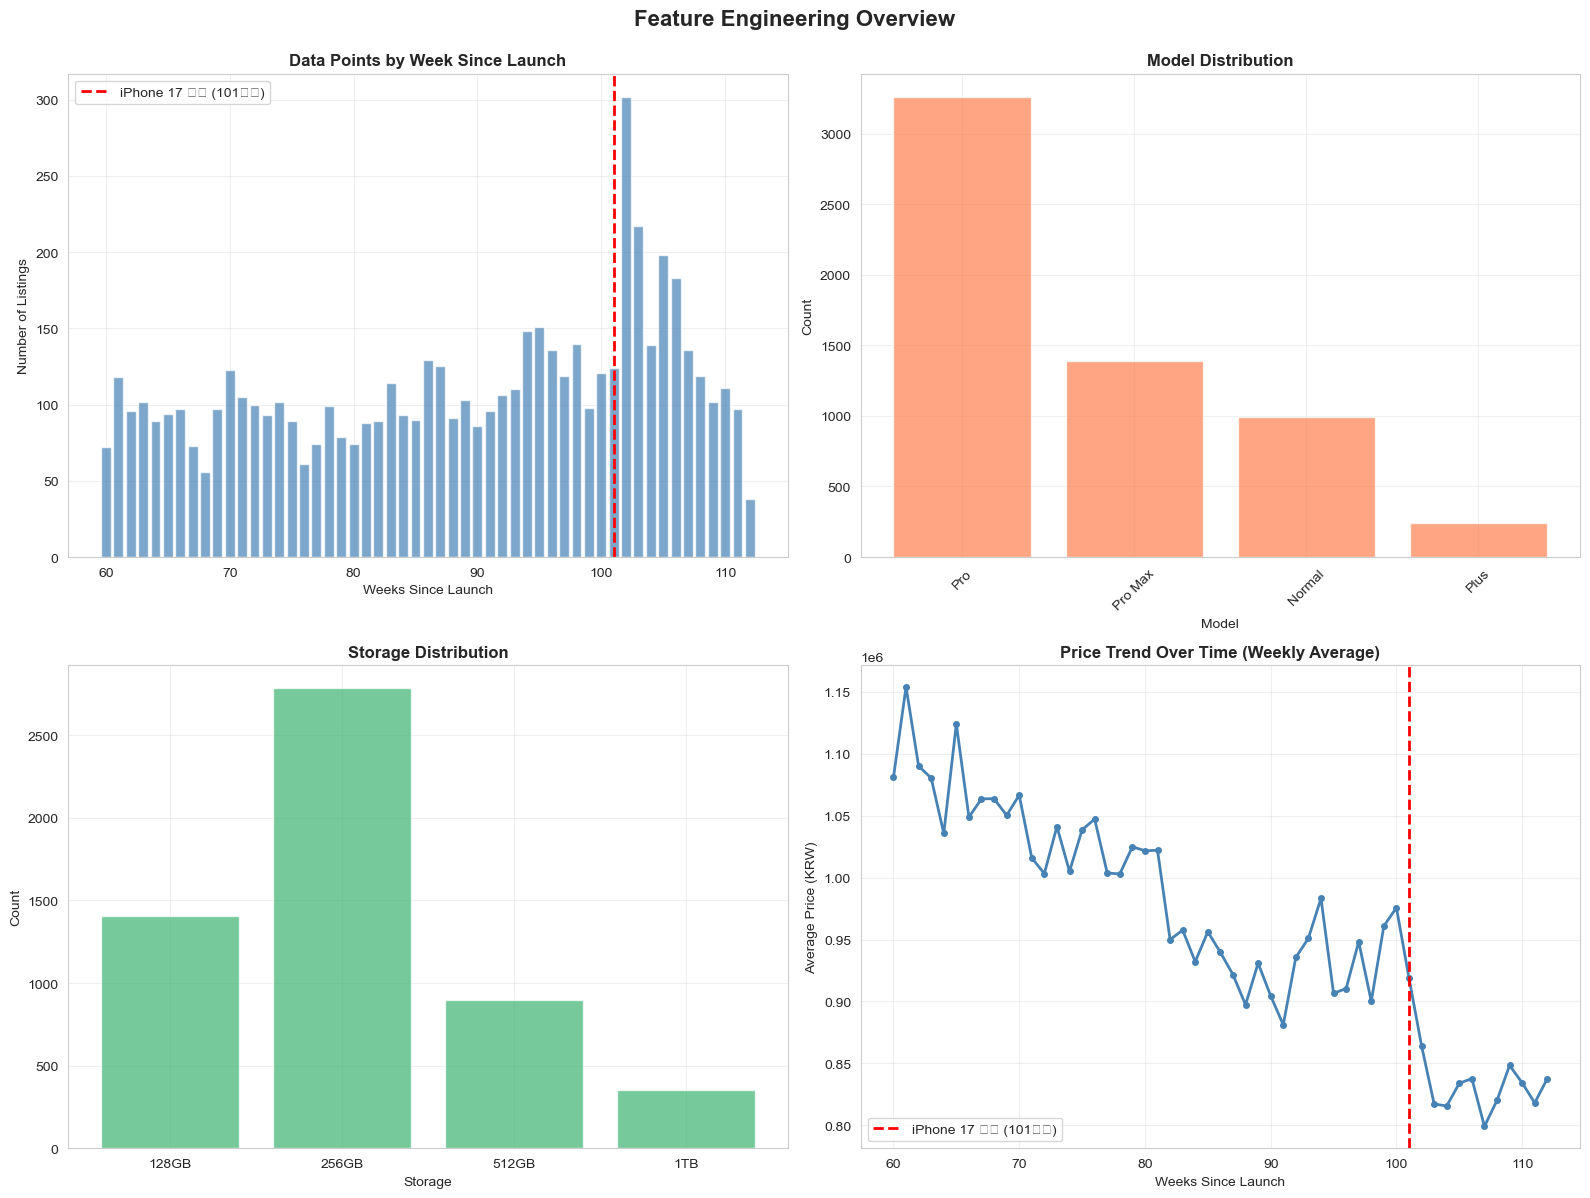

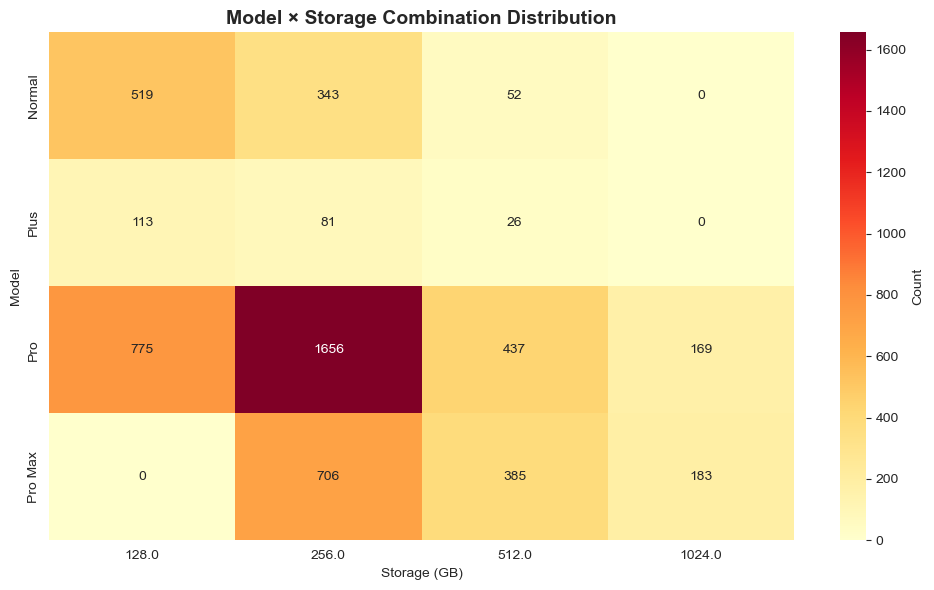

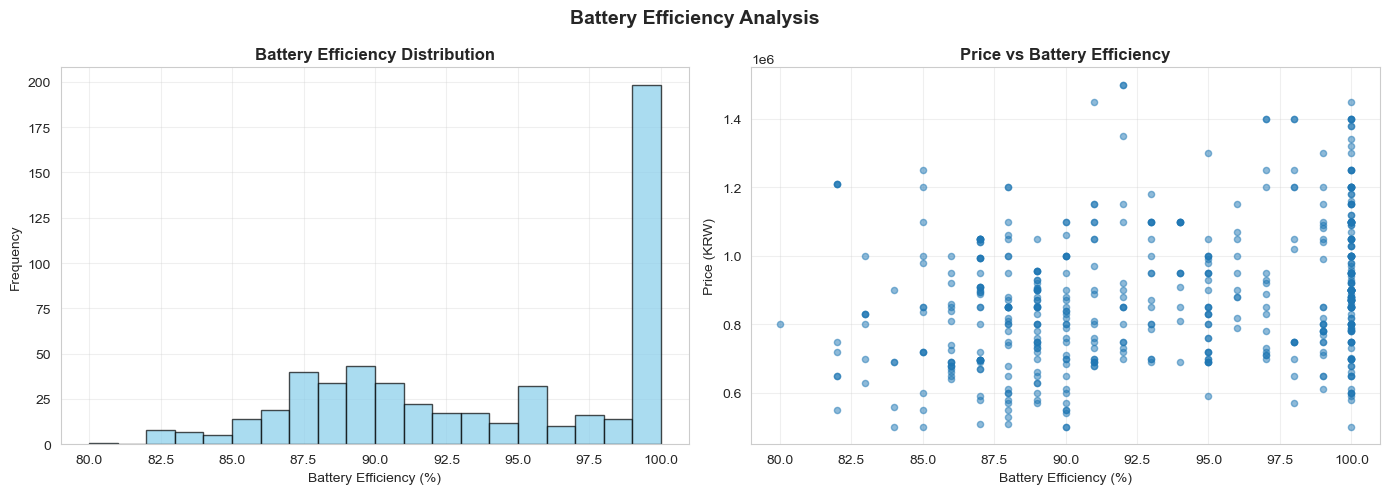


✅ 모든 시각화 자료가 저장되었습니다!
  - feature_engineering_overview.png
  - model_storage_heatmap.png
  - battery_analysis.png


In [ ]:
# Feature Engineering 시각화 자료 생성
print("="*60)
print("[Feature Engineering 시각화 자료]")
print("="*60)

# iPhone 17 출시일 계산 (2025-09-19)
from datetime import datetime
iphone15_launch = datetime(2023, 10, 13)
iphone17_launch = datetime(2025, 9, 19)
iphone17_weeks = (iphone17_launch - iphone15_launch).days // 7

# 1. 시간 변수 분포 (weeks_since_launch)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1-1. 주차별 데이터 포인트 수 (iPhone 17 출시일 강조)
week_counts = df_all.groupby('weeks_since_launch').size().reset_index()
week_counts.columns = ['weeks_since_launch', 'count']

axes[0, 0].bar(week_counts['weeks_since_launch'], week_counts['count'], alpha=0.7, color='steelblue')
# iPhone 17 출시일 수직선 추가
axes[0, 0].axvline(x=iphone17_weeks, color='red', linestyle='--', linewidth=2, label=f'iPhone 17 출시 ({iphone17_weeks}주차)')
axes[0, 0].set_title('Data Points by Week Since Launch', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Weeks Since Launch')
axes[0, 0].set_ylabel('Number of Listings')
axes[0, 0].legend(loc='best')
axes[0, 0].grid(True, alpha=0.3)

# 1-2. 모델별 분포 (Bar Chart) - 등급 대신 모델로 대체
model_counts = df_all['final_model'].value_counts()
axes[0, 1].bar(model_counts.index, model_counts.values, color='coral', alpha=0.7)
axes[0, 1].set_title('Model Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 1-3. 용량별 분포 (Bar Chart)
storage_counts = df_all['final_storage'].value_counts().sort_index()
axes[1, 0].bar([f'{int(s)}GB' if s < 1024 else '1TB' for s in storage_counts.index], 
                storage_counts.values, color='mediumseagreen', alpha=0.7)
axes[1, 0].set_title('Storage Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Storage')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3)

# 1-4. 주차별 평균 가격 추이 (iPhone 17 출시일 강조)
weekly_avg = df_all.groupby('weeks_since_launch')['price'].mean().reset_index()
axes[1, 1].plot(weekly_avg['weeks_since_launch'], weekly_avg['price'], marker='o', linewidth=2, markersize=4, color='steelblue')
# iPhone 17 출시일 수직선 추가
axes[1, 1].axvline(x=iphone17_weeks, color='red', linestyle='--', linewidth=2, label=f'iPhone 17 출시 ({iphone17_weeks}주차)')
axes[1, 1].set_title('Price Trend Over Time (Weekly Average)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Weeks Since Launch')
axes[1, 1].set_ylabel('Average Price (KRW)')
axes[1, 1].legend(loc='best')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Feature Engineering Overview', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('feature_engineering_overview.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 모델 × 용량 조합 히트맵
model_storage = df_all.groupby(['final_model', 'final_storage']).size().reset_index()
model_storage.columns = ['model', 'storage', 'count']
heatmap_data = model_storage.pivot(index='model', columns='storage', values='count')
heatmap_data = heatmap_data.reindex(['Normal', 'Plus', 'Pro', 'Pro Max'])

# 128, 256, 512, 1024 컬럼만 선택 (존재하는 것만)
available_cols = [col for col in [128, 256, 512, 1024] if col in heatmap_data.columns]
heatmap_data = heatmap_data[available_cols]

# NaN을 0으로 채우기
heatmap_data = heatmap_data.fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Model × Storage Combination Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Storage (GB)')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig('model_storage_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 배터리 효율 분포 (있는 경우만)
battery_df = df_all.dropna(subset=['battery_clean'])
if len(battery_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 히스토그램
    axes[0].hist(battery_df['battery_clean'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    axes[0].set_title('Battery Efficiency Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Battery Efficiency (%)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True, alpha=0.3)
    
    # 배터리 vs 가격 산점도
    axes[1].scatter(battery_df['battery_clean'], battery_df['price'], alpha=0.5, s=20)
    axes[1].set_title('Price vs Battery Efficiency', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Battery Efficiency (%)')
    axes[1].set_ylabel('Price (KRW)')
    axes[1].grid(True, alpha=0.3)
    
    plt.suptitle('Battery Efficiency Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('battery_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n✅ 모든 시각화 자료가 저장되었습니다!")
print("  - feature_engineering_overview.png")
print("  - model_storage_heatmap.png")
if len(battery_df) > 0:
    print("  - battery_analysis.png")


[Statistical Modeling 파트 PPT 슬라이드용 시각화]

[Plot 1-1: Weekly Average Price Trend + Model Prediction]


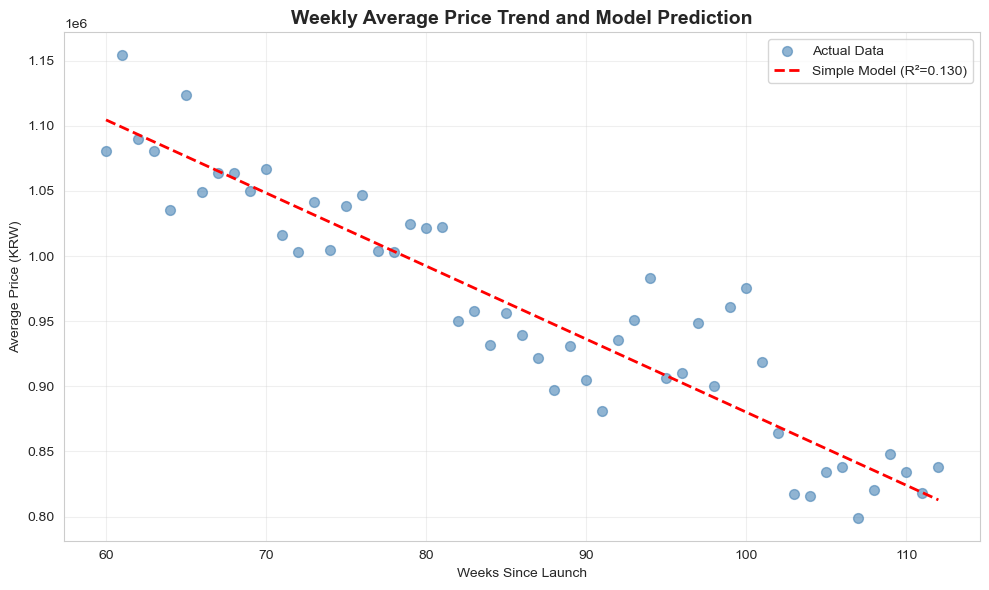


[Plot 1-2: Model Comparison - R²]


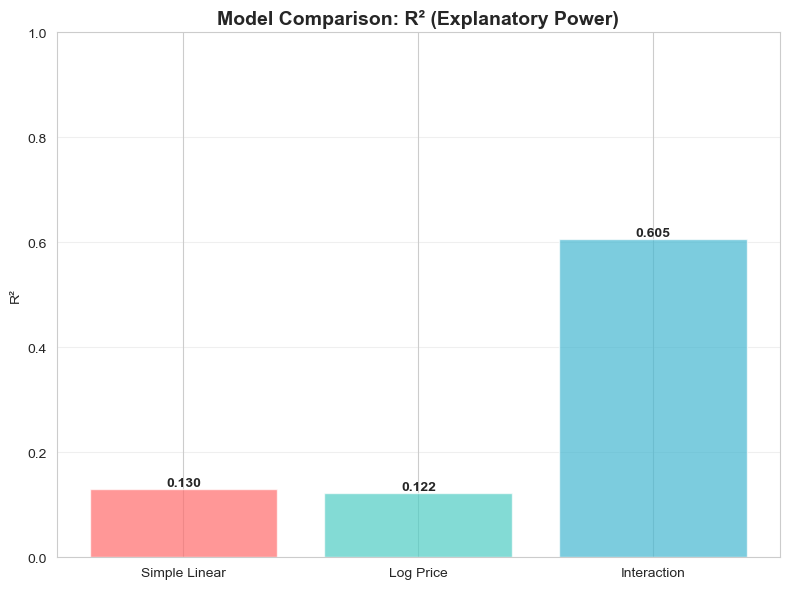


[Plot 1-3: Regression Coefficients Summary]


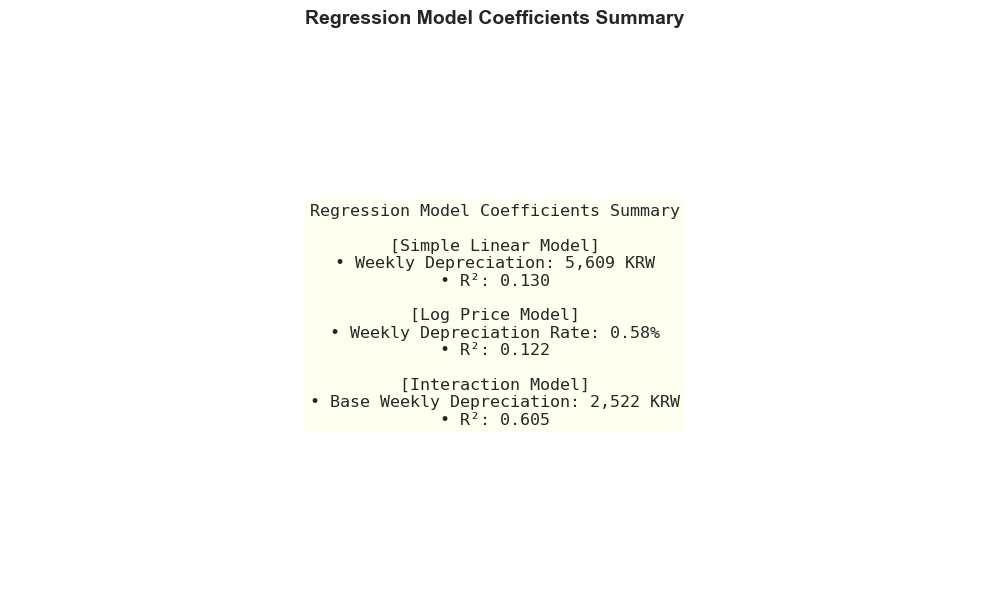


[Plot 1-4: Weekly Price Trend (Log Scale)]


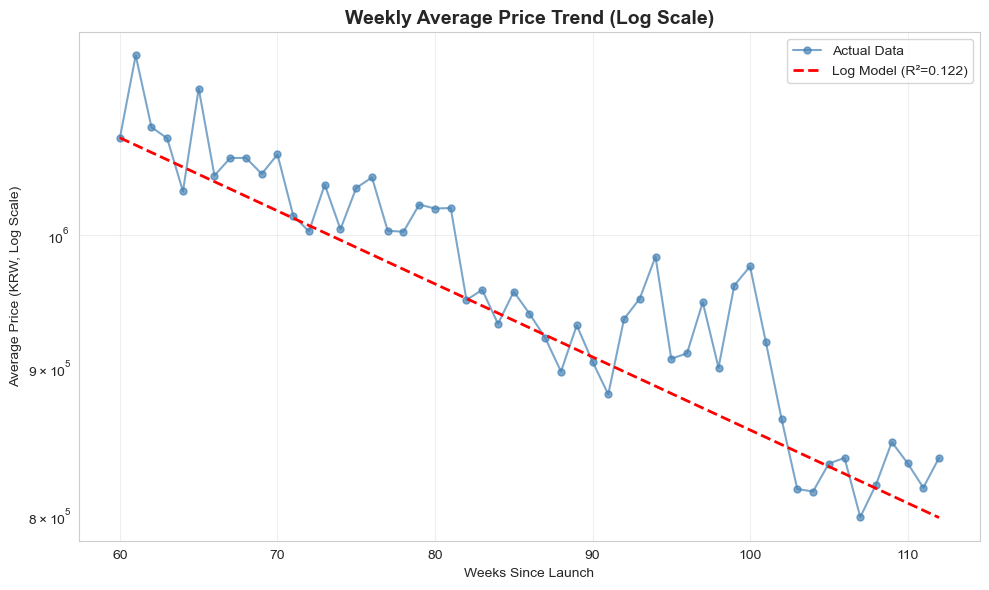


[Plot 2-1: Weekly Average Price Trend by Grade]


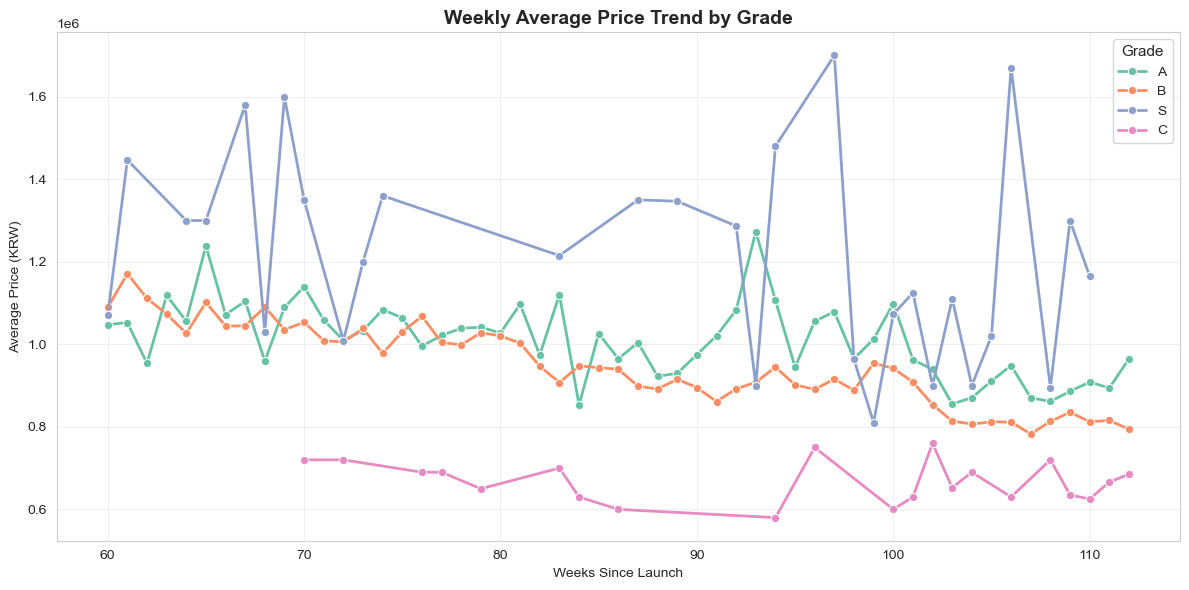


[Plot 2-2: Depreciation Rate Comparison by Grade]


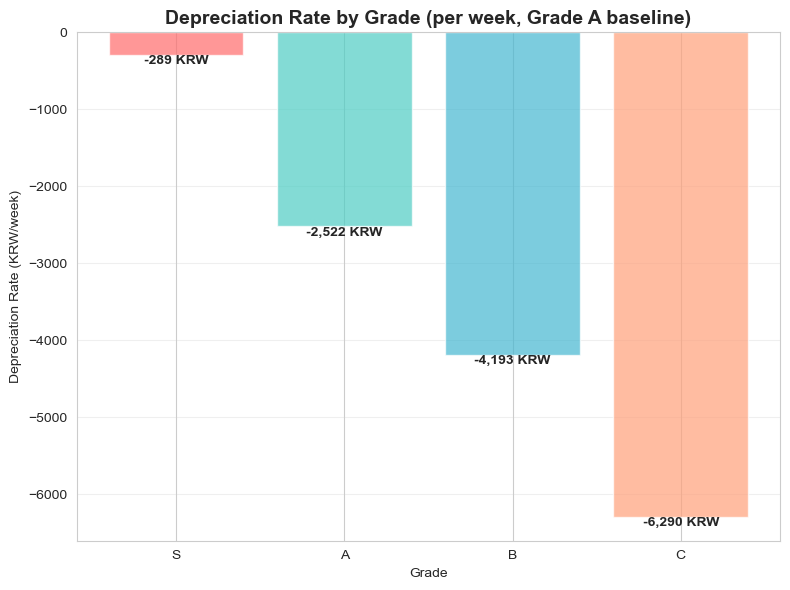


[Plot 2-3: Normal Model - Weekly Average Price Trend by Grade]


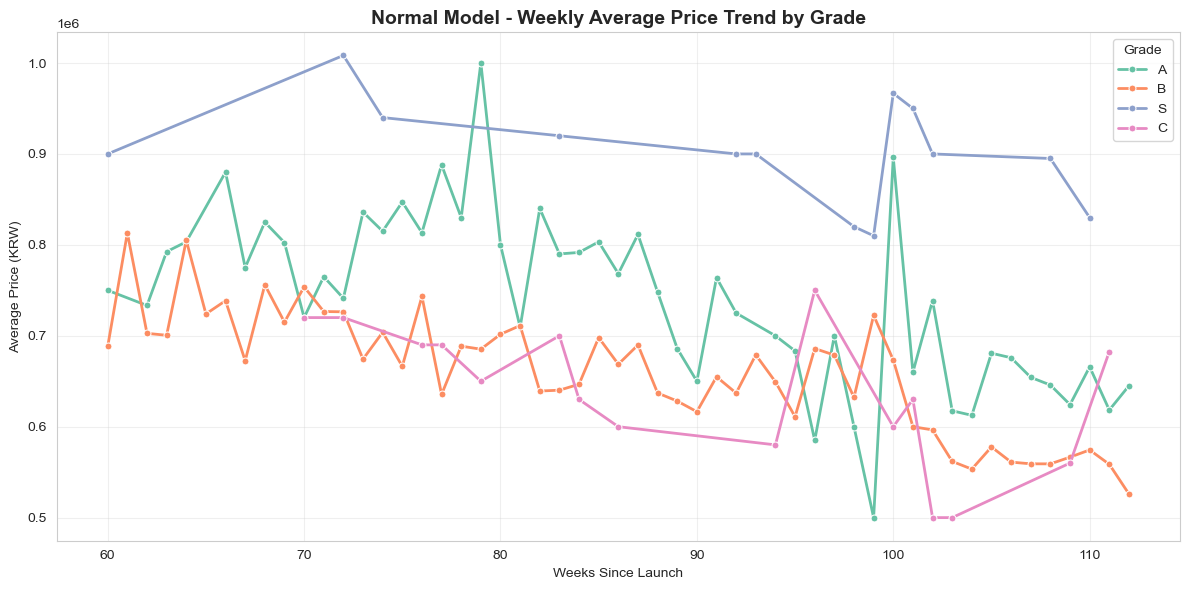


[Plot 2-4: Pro Max Model - Weekly Average Price Trend by Grade]


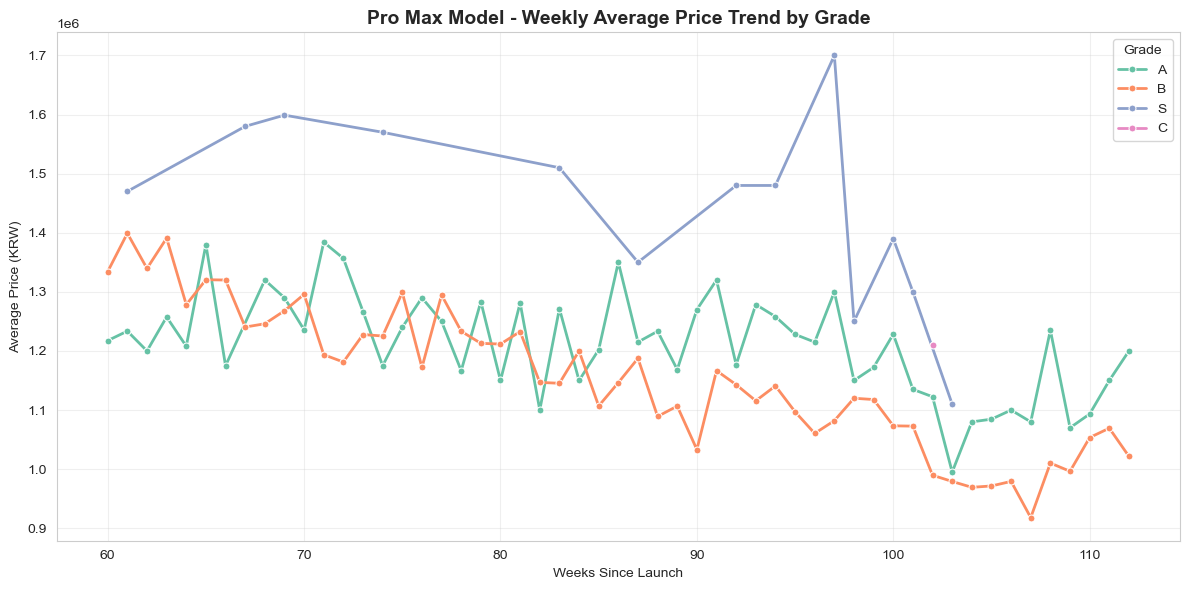


[Plot 2-5: Initial Expected Price by Grade]


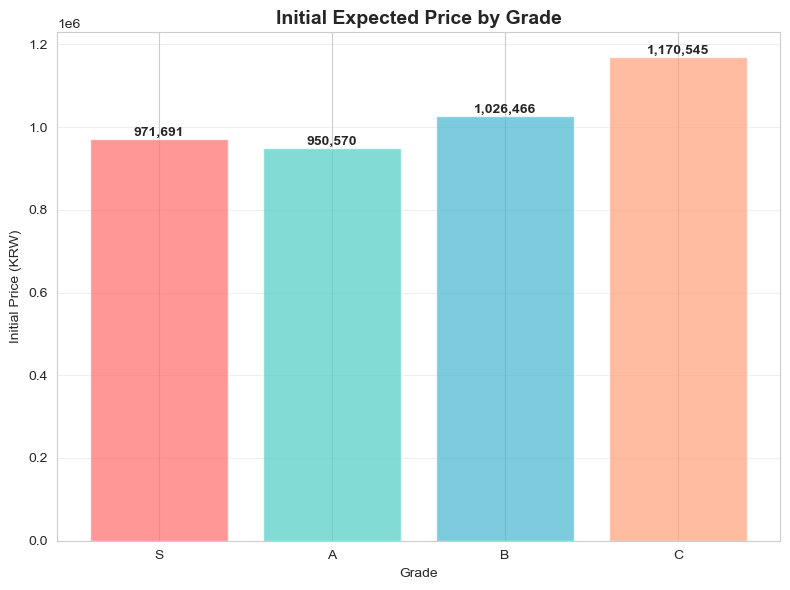


All Statistical Modeling plots completed!


In [48]:
# ============================================================
# Statistical Modeling 파트 PPT 슬라이드용 시각화
# 각 plot을 개별적으로 표시
# ============================================================
print("="*60)
print("[Statistical Modeling 파트 PPT 슬라이드용 시각화]")
print("="*60)

# 모델 재계산
step2_df = df_all.copy()
step2_df['log_price'] = np.log(step2_df['price'])

simple_model = smf.ols('price ~ weeks_since_launch', data=step2_df).fit()
log_model = smf.ols('log_price ~ weeks_since_launch', data=step2_df).fit()
interaction_model = smf.ols(
    'price ~ weeks_since_launch * C(prompt_grade) + weeks_since_launch * C(final_model) + C(final_model)',
    data=step2_df
).fit()

# ============================================================
# 슬라이드 1: 시간 기반 감가 모델링
# ============================================================

# Plot 1-1: 주차별 평균 가격 추이 + 모델 예측선
print("\n[Plot 1-1: Weekly Average Price Trend + Model Prediction]")
weekly_avg = step2_df.groupby('weeks_since_launch')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(weekly_avg['weeks_since_launch'], weekly_avg['price'], 
            alpha=0.6, s=50, color='steelblue', label='Actual Data')
x_range = np.linspace(weekly_avg['weeks_since_launch'].min(), 
                      weekly_avg['weeks_since_launch'].max(), 100)
y_pred_simple = simple_model.params['Intercept'] + simple_model.params['weeks_since_launch'] * x_range
plt.plot(x_range, y_pred_simple, 'r--', linewidth=2, 
         label=f'Simple Model (R²={simple_model.rsquared:.3f})')
plt.title('Weekly Average Price Trend and Model Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Average Price (KRW)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 1-2: 모델별 R² 비교
print("\n[Plot 1-2: Model Comparison - R²]")
models_r2 = {
    'Simple Linear': simple_model.rsquared,
    'Log Price': log_model.rsquared,
    'Interaction': interaction_model.rsquared
}
plt.figure(figsize=(8, 6))
bars = plt.bar(models_r2.keys(), models_r2.values(), 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.7)
plt.title('Model Comparison: R² (Explanatory Power)', fontsize=14, fontweight='bold')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')
for bar, (model, r2) in zip(bars, models_r2.items()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{r2:.3f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Plot 1-3: 회귀 계수 요약
print("\n[Plot 1-3: Regression Coefficients Summary]")
plt.figure(figsize=(10, 6))
plt.axis('off')
coef_text = f"""Regression Model Coefficients Summary

[Simple Linear Model]
• Weekly Depreciation: {abs(simple_model.params['weeks_since_launch']):,.0f} KRW
• R²: {simple_model.rsquared:.3f}

[Log Price Model]
• Weekly Depreciation Rate: {abs(log_model.params['weeks_since_launch']) * 100:.2f}%
• R²: {log_model.rsquared:.3f}

[Interaction Model]
• Base Weekly Depreciation: {abs(interaction_model.params['weeks_since_launch']):,.0f} KRW
• R²: {interaction_model.rsquared:.3f}"""
plt.text(0.5, 0.5, coef_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='center', horizontalalignment='center',
         family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))
plt.title('Regression Model Coefficients Summary', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Plot 1-4: 주차별 가격 추이 (Log Scale)
print("\n[Plot 1-4: Weekly Price Trend (Log Scale)]")
weekly_avg_log = step2_df.groupby('weeks_since_launch')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.semilogy(weekly_avg_log['weeks_since_launch'], weekly_avg_log['price'], 
             'o-', alpha=0.7, color='steelblue', label='Actual Data', markersize=5)
x_range = np.linspace(weekly_avg_log['weeks_since_launch'].min(),
                      weekly_avg_log['weeks_since_launch'].max(), 100)
log_y_pred = np.exp(log_model.params['Intercept'] + log_model.params['weeks_since_launch'] * x_range)
plt.semilogy(x_range, log_y_pred, 'r--', linewidth=2,
             label=f'Log Model (R²={log_model.rsquared:.3f})')
plt.title('Weekly Average Price Trend (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Average Price (KRW, Log Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 슬라이드 2: 등급별 감가 차이 분석
# ============================================================

# Plot 2-1: 등급별 주차별 평균 가격 추이
print("\n[Plot 2-1: Weekly Average Price Trend by Grade]")
grade_weekly = (
    df_all.groupby(['weeks_since_launch', 'prompt_grade'])['price']
    .mean()
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grade_weekly,
    x='weeks_since_launch',
    y='price',
    hue='prompt_grade',
    marker='o',
    palette='Set2',
    linewidth=2,
    markersize=6
)
plt.title('Weekly Average Price Trend by Grade', fontsize=14, fontweight='bold')
plt.xlabel('Weeks Since Launch')
plt.ylabel('Average Price (KRW)')
plt.legend(title='Grade', title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2-2: 등급별 감가율 비교
print("\n[Plot 2-2: Depreciation Rate Comparison by Grade]")
grade_depreciation = {}
base_depreciation = interaction_model.params['weeks_since_launch']
for grade in ['S', 'A', 'B', 'C']:
    if grade == 'A':
        grade_depreciation[grade] = base_depreciation
    else:
        interaction_key = f'weeks_since_launch:C(prompt_grade)[T.{grade}]'
        if interaction_key in interaction_model.params:
            grade_depreciation[grade] = base_depreciation + interaction_model.params[interaction_key]
        else:
            grade_depreciation[grade] = base_depreciation

grade_order = ['S', 'A', 'B', 'C']
depreciation_values = [grade_depreciation.get(g, 0) for g in grade_order]
colors_dep = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

plt.figure(figsize=(8, 6))
bars = plt.bar(grade_order, depreciation_values, color=colors_dep, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Depreciation Rate by Grade (per week, Grade A baseline)', fontsize=14, fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Depreciation Rate (KRW/week)')
plt.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, depreciation_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:,.0f} KRW', ha='center', 
             va='bottom' if height > 0 else 'top', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

# Plot 2-3: Normal 모델별 등급별 주차별 평균 가격 추이
print("\n[Plot 2-3: Normal Model - Weekly Average Price Trend by Grade]")
model_data = df_all[df_all['final_model'] == 'Normal']
grade_weekly_model = (
    model_data.groupby(['weeks_since_launch', 'prompt_grade'])['price']
    .mean()
    .reset_index()
)
if len(grade_weekly_model) > 0:
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=grade_weekly_model,
        x='weeks_since_launch',
        y='price',
        hue='prompt_grade',
        marker='o',
        palette='Set2',
        linewidth=2,
        markersize=5
    )
    plt.title('Normal Model - Weekly Average Price Trend by Grade', fontsize=14, fontweight='bold')
    plt.xlabel('Weeks Since Launch')
    plt.ylabel('Average Price (KRW)')
    plt.legend(title='Grade', title_fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot 2-4: Pro Max 모델별 등급별 주차별 평균 가격 추이
print("\n[Plot 2-4: Pro Max Model - Weekly Average Price Trend by Grade]")
model_data = df_all[df_all['final_model'] == 'Pro Max']
grade_weekly_model = (
    model_data.groupby(['weeks_since_launch', 'prompt_grade'])['price']
    .mean()
    .reset_index()
)
if len(grade_weekly_model) > 0:
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=grade_weekly_model,
        x='weeks_since_launch',
        y='price',
        hue='prompt_grade',
        marker='o',
        palette='Set2',
        linewidth=2,
        markersize=5
    )
    plt.title('Pro Max Model - Weekly Average Price Trend by Grade', fontsize=14, fontweight='bold')
    plt.xlabel('Weeks Since Launch')
    plt.ylabel('Average Price (KRW)')
    plt.legend(title='Grade', title_fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot 2-5: 등급별 초기 예상 가격
print("\n[Plot 2-5: Initial Expected Price by Grade]")
grade_initial_price = {}
intercept = interaction_model.params['Intercept']
for grade in ['S', 'A', 'B', 'C']:
    if grade == 'A':
        grade_initial_price[grade] = intercept
    else:
        grade_key = f'C(prompt_grade)[T.{grade}]'
        if grade_key in interaction_model.params:
            grade_initial_price[grade] = intercept + interaction_model.params[grade_key]
        else:
            grade_initial_price[grade] = intercept

grade_order = ['S', 'A', 'B', 'C']
initial_values = [grade_initial_price.get(g, 0) for g in grade_order]
plt.figure(figsize=(8, 6))
bars = plt.bar(grade_order, initial_values, color=colors_dep, alpha=0.7)
plt.title('Initial Expected Price by Grade', fontsize=14, fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Initial Price (KRW)')
plt.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, initial_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:,.0f}', ha='center', va='bottom', 
             fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

print("\nAll Statistical Modeling plots completed!")




[9. Price Strategy Simulation - PPT Visualization]
Pro model samples: 3262 rows
Pro model price range: 400,000 - 1,700,000 KRW
Pro model average price: 949,673 KRW
Pro model median price: 920,000 KRW

[Plot 9-1: Markdown Strategy Comparison]
Initial price (Pro model median): 920,000 KRW


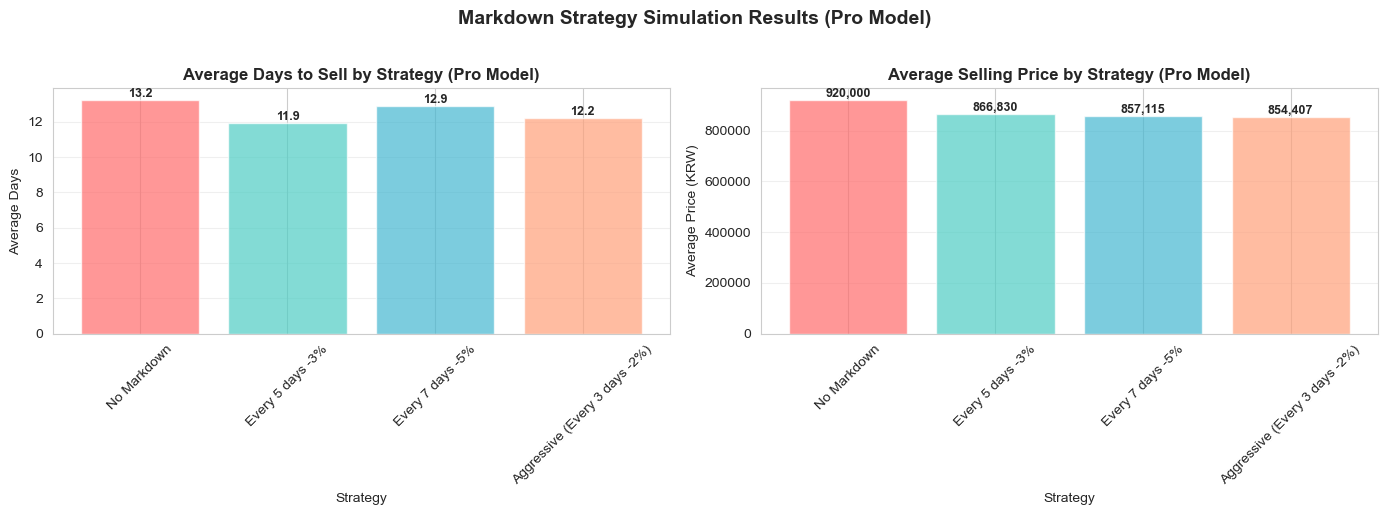


[Plot 9-2: Sales Time Reduction Effect]


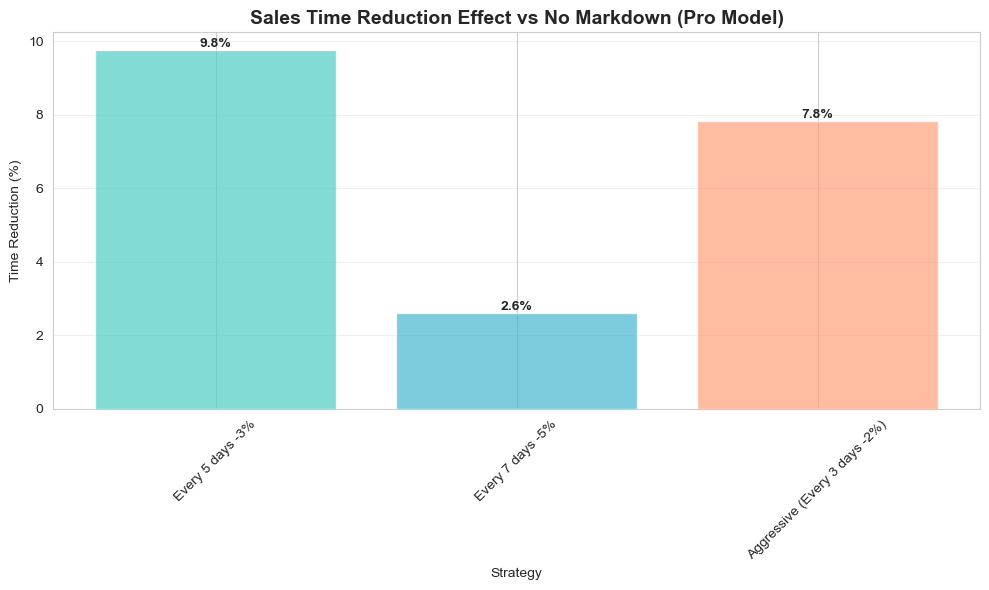


Price Strategy Simulation plots completed!


In [49]:
# ============================================================
# 9. Price Strategy Simulation - PPT Visualization
# ============================================================
print("="*60)
print("[9. Price Strategy Simulation - PPT Visualization]")
print("="*60)

# Filter to Pro model only (largest sample)
df_pro = df_all[df_all['final_model'] == 'Pro'].copy()
print(f"Pro model samples: {len(df_pro)} rows")
print(f"Pro model price range: {df_pro['price'].min():,.0f} - {df_pro['price'].max():,.0f} KRW")
print(f"Pro model average price: {df_pro['price'].mean():,.0f} KRW")
print(f"Pro model median price: {df_pro['price'].median():,.0f} KRW")

# Reuse simulation code from Cell 16
import numpy as np
from scipy.stats import norm

def simulate_markdown_strategy(initial_price, markdown_rule, days_to_sell_prob, max_days=90):
    """Markdown strategy simulation"""
    current_price = initial_price
    current_day = 0
    price_history = []
    
    for day in range(max_days):
        # Apply markdown rules
        for rule in markdown_rule:
            if day % rule['days'] == 0 and day > 0:
                current_price = current_price * (1 + rule['pct'])
                current_price = max(current_price, initial_price * 0.5)
        
        price_history.append({
            'day': day,
            'price': current_price,
            'sell_prob': days_to_sell_prob(day, current_price, initial_price)
        })
        
        if np.random.random() < days_to_sell_prob(day, current_price, initial_price):
            return {
                'sold_day': day,
                'final_price': current_price,
                'price_history': price_history
            }
    
    return {
        'sold_day': max_days,
        'final_price': current_price,
        'price_history': price_history
    }

def sell_probability(day, current_price, initial_price):
    """Sales probability function"""
    price_ratio = current_price / initial_price
    base_prob = 0.01
    price_effect = (1 - price_ratio) * 0.05
    time_effect = min(day / 100, 0.1)
    return min(base_prob + price_effect + time_effect, 0.3)

# Scenario comparison
strategies = {
    'No Markdown': [],
    'Every 5 days -3%': [{'days': 5, 'pct': -0.03}],
    'Every 7 days -5%': [{'days': 7, 'pct': -0.05}],
    'Aggressive (Every 3 days -2%)': [{'days': 3, 'pct': -0.02}]
}

print("\n[Plot 9-1: Markdown Strategy Comparison]")
# Use median price as initial_price for simulation
initial_price = int(df_pro['price'].median())
print(f"Initial price (Pro model median): {initial_price:,.0f} KRW")

results = {}

for strategy_name, rules in strategies.items():
    sold_days = []
    final_prices = []
    
    for _ in range(1000):
        result = simulate_markdown_strategy(initial_price, rules, sell_probability, max_days=60)
        sold_days.append(result['sold_day'])
        final_prices.append(result['final_price'])
    
    results[strategy_name] = {
        'avg_days': np.mean(sold_days),
        'std_days': np.std(sold_days),
        'avg_price': np.mean(final_prices),
        'median_days': np.median(sold_days)
    }

# Plot 9-1: Average Days to Sell Comparison
strategy_df = pd.DataFrame(results).T
strategy_df = strategy_df.reset_index()
strategy_df.columns = ['strategy', 'avg_days', 'std_days', 'avg_price', 'median_days']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bars1 = axes[0].bar(strategy_df['strategy'], strategy_df['avg_days'], 
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.7)
axes[0].set_title('Average Days to Sell by Strategy (Pro Model)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Strategy')
axes[0].set_ylabel('Average Days')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars1, strategy_df['avg_days']):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

bars2 = axes[1].bar(strategy_df['strategy'], strategy_df['avg_price'], 
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.7)
axes[1].set_title('Average Selling Price by Strategy (Pro Model)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Strategy')
axes[1].set_ylabel('Average Price (KRW)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars2, strategy_df['avg_price']):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{val:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('Markdown Strategy Simulation Results (Pro Model)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Plot 9-2: Sales Time Reduction Effect
print("\n[Plot 9-2: Sales Time Reduction Effect]")
baseline_days = results['No Markdown']['avg_days']
reductions = []
for strategy_name, result in results.items():
    if strategy_name != 'No Markdown':
        reduction = ((baseline_days - result['avg_days']) / baseline_days) * 100
        reductions.append({'strategy': strategy_name, 'reduction': reduction})

reduction_df = pd.DataFrame(reductions)
plt.figure(figsize=(10, 6))
bars = plt.bar(reduction_df['strategy'], reduction_df['reduction'], 
               color=['#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.7)
plt.title('Sales Time Reduction Effect vs No Markdown (Pro Model)', fontsize=14, fontweight='bold')
plt.xlabel('Strategy')
plt.ylabel('Time Reduction (%)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.tick_params(axis='x', rotation=45)
plt.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, reduction_df['reduction']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.1f}%', ha='center', 
             va='bottom' if height > 0 else 'top', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

print("\nPrice Strategy Simulation plots completed!")


[10. Price Stability Index (PSI) - PPT Visualization]
Pro model samples: 3262 rows

[Plot 10-1: Price Stability Index by Grade]


/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/1162509401.py:41: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  plt.tight_layout()
/Users/miin/miniconda3/envs/dsp/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


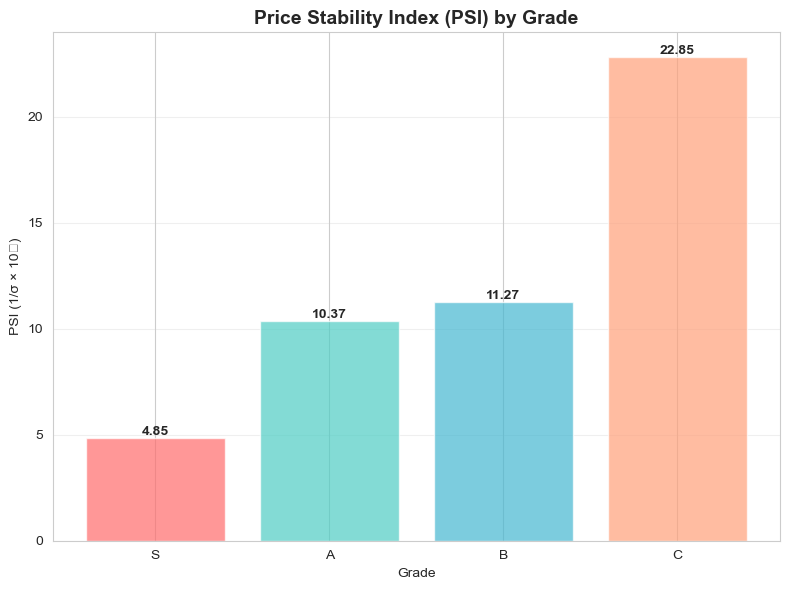


[Plot 10-2: Price Stability Index by Model]
Note: Analysis focuses on Pro model only
Pro model PSI: 11.74

[Plot 10-3: PSI Heatmap by Grade × Model (Pro Model Only)]


/var/folders/5m/rywy7zrx7nbgkf3xcqvypw780000gn/T/ipykernel_11470/1162509401.py:81: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  plt.tight_layout()


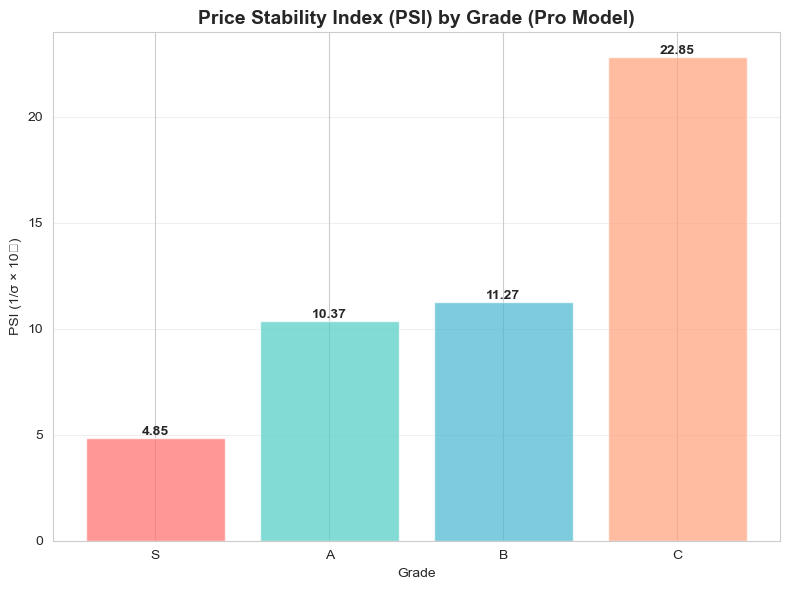


Price Stability Index (PSI) plots completed!


In [ ]:
# ============================================================
# 10. Price Stability Index (PSI) - PPT Visualization
# ============================================================
print("="*60)
print("[10. Price Stability Index (PSI) - PPT Visualization]")
print("="*60)

# Filter to Pro model only (largest sample)
df_pro = df_all[df_all['final_model'] == 'Pro'].copy()
print(f"Pro model samples: {len(df_pro)} rows")

# PSI = 1 / σ (σ: standard deviation of price volatility over time)
# Calculate PSI by computing standard deviation of weekly prices

# Plot 10-1: PSI by Grade
print("\n[Plot 10-1: Price Stability Index by Grade]")
grade_psi = {}
for grade in ['S', 'A', 'B', 'C']:
    grade_data = df_pro[df_pro['prompt_grade'] == grade]
    if len(grade_data) > 0:
        weekly_prices = grade_data.groupby('weeks_since_launch')['price'].mean()
        if len(weekly_prices) > 1:
            std_price = weekly_prices.std()
            psi = 1 / std_price if std_price > 0 else 0
            grade_psi[grade] = psi * 1e6  # Scale adjustment (1/KRW → 1/(KRW*1e-6))

grade_order = ['S', 'A', 'B', 'C']
psi_values = [grade_psi.get(g, 0) for g in grade_order]
colors_psi = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

plt.figure(figsize=(8, 6))
bars = plt.bar(grade_order, psi_values, color=colors_psi, alpha=0.7)
plt.title('Price Stability Index (PSI) by Grade', fontsize=14, fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('PSI (1/σ × 10⁶)')
plt.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, psi_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

# Plot 10-2: PSI by Model (Pro model only - single value)
print("\n[Plot 10-2: Price Stability Index by Model]")
print("Note: Analysis focuses on Pro model only")
# Calculate PSI for Pro model
pro_weekly_prices = df_pro.groupby('weeks_since_launch')['price'].mean()
if len(pro_weekly_prices) > 1:
    std_price = pro_weekly_prices.std()
    pro_psi = (1 / std_price * 1e6) if std_price > 0 else 0
    print(f"Pro model PSI: {pro_psi:.2f}")

# Plot 10-3: PSI Heatmap by Grade × Model (Pro model only)
print("\n[Plot 10-3: PSI Heatmap by Grade × Model (Pro Model Only)]")
psi_heatmap_data = []
for grade in ['S', 'A', 'B', 'C']:
    combo_data = df_pro[df_pro['prompt_grade'] == grade]
    if len(combo_data) > 0:
        weekly_prices = combo_data.groupby('weeks_since_launch')['price'].mean()
        if len(weekly_prices) > 1:
            std_price = weekly_prices.std()
            psi = 1 / std_price if std_price > 0 else 0
            psi_heatmap_data.append({'grade': grade, 'model': 'Pro', 'psi': psi * 1e6})

if len(psi_heatmap_data) > 0:
    psi_df = pd.DataFrame(psi_heatmap_data)
    # Simple bar chart for Pro model grades
    plt.figure(figsize=(8, 6))
    grade_list = [d['grade'] for d in psi_heatmap_data]
    psi_list = [d['psi'] for d in psi_heatmap_data]
    bars = plt.bar(grade_list, psi_list, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.7)
    plt.title('Price Stability Index (PSI) by Grade (Pro Model)', fontsize=14, fontweight='bold')
    plt.xlabel('Grade')
    plt.ylabel('PSI (1/σ × 10⁶)')
    plt.grid(True, alpha=0.3, axis='y')
    for bar, val in zip(bars, psi_list):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()

print("\n✅ Price Stability Index (PSI) plots completed!")


[11. Key Findings - PPT Visualization]
Pro model samples: 3262 rows

[Plot 11-1: Feature Importance (R² Contribution)]


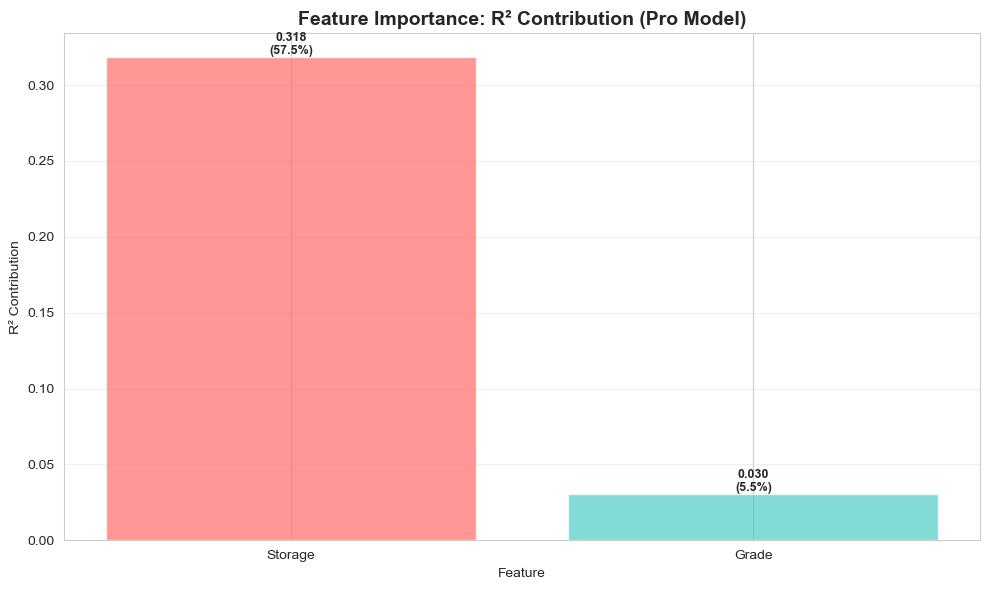


[Plot 11-2: Grade Effect Size (Interaction R² Contribution)]


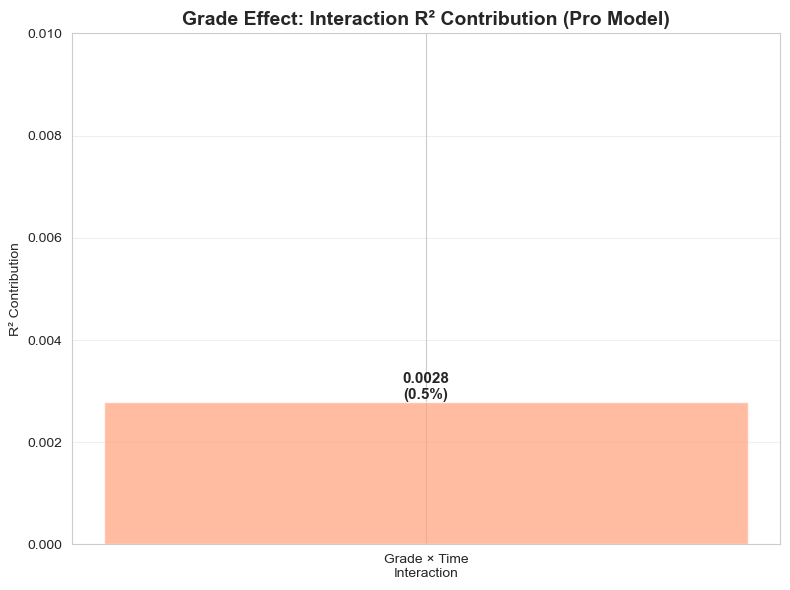


[Plot 11-3: Battery Information Effect]


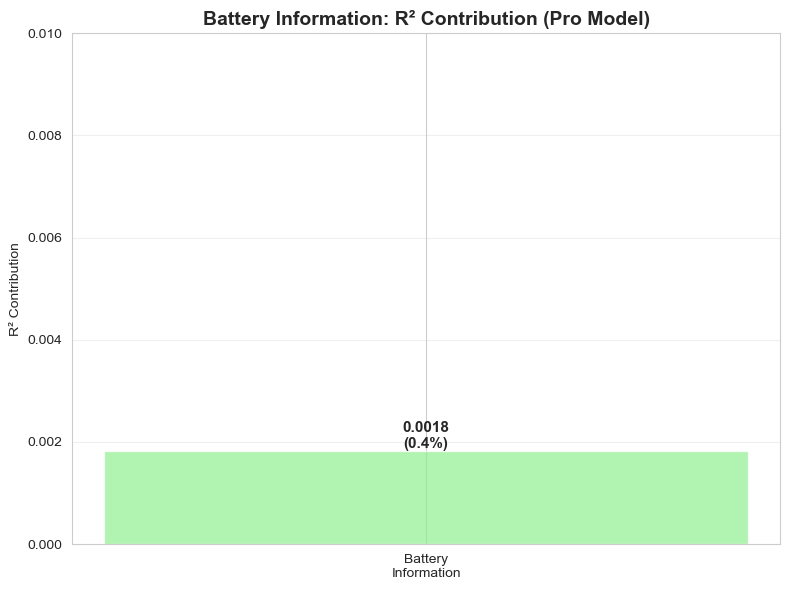


Key Findings plots completed!


In [ ]:
# ============================================================
# 11. Key Findings - PPT Visualization
# ============================================================
print("="*60)
print("[11. Key Findings - PPT Visualization]")
print("="*60)

# Filter to Pro model only
df_pro = df_all[df_all['final_model'] == 'Pro'].copy()
print(f"Pro model samples: {len(df_pro)} rows")

step2_df_storage = df_pro.dropna(subset=['final_storage']).copy()

# Plot 11-1: Feature Importance (R² Contribution)
print("\n[Plot 11-1: Feature Importance (R² Contribution)]")
base_model = smf.ols('price ~ weeks_since_launch', data=step2_df_storage).fit()
base_r2 = base_model.rsquared

factors = {
    'Base (Time)': base_r2,
    '+ Storage': smf.ols('price ~ weeks_since_launch + final_storage', data=step2_df_storage).fit().rsquared,
    '+ Grade': smf.ols('price ~ weeks_since_launch + final_storage + C(prompt_grade)', data=step2_df_storage).fit().rsquared,
}

contributions = {}
prev_r2 = base_r2
for factor, r2 in factors.items():
    if factor != 'Base (Time)':
        contributions[factor] = r2 - prev_r2
        prev_r2 = r2

sorted_contributions = sorted(contributions.items(), key=lambda x: x[1], reverse=True)
total_explained = max(factors.values())

plt.figure(figsize=(10, 6))
factor_names = [f.replace('+ ', '') for f, _ in sorted_contributions]
contribution_values = [c for _, c in sorted_contributions]
colors_factors = ['#FF6B6B', '#4ECDC4']

bars = plt.bar(factor_names, contribution_values, color=colors_factors, alpha=0.7)
plt.title('Feature Importance: R² Contribution (Pro Model)', fontsize=14, fontweight='bold')
plt.xlabel('Feature')
plt.ylabel('R² Contribution')
plt.grid(True, alpha=0.3, axis='y')
for bar, (factor, contribution) in zip(bars, sorted_contributions):
    height = bar.get_height()
    pct = (contribution / total_explained) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{contribution:.3f}\n({pct:.1f}%)', ha='center', va='bottom', 
             fontweight='bold', fontsize=9)
plt.tight_layout()
plt.show()

# Plot 11-2: Grade Effect Size (Interaction R² Contribution)
print("\n[Plot 11-2: Grade Effect Size (Interaction R² Contribution)]")
time_grade_interaction = smf.ols(
    'price ~ C(prompt_grade) * weeks_since_launch + final_storage',
    data=step2_df_storage
).fit()

time_grade_no_interaction = smf.ols(
    'price ~ C(prompt_grade) + weeks_since_launch + final_storage',
    data=step2_df_storage
).fit()

grade_interaction_r2 = time_grade_interaction.rsquared - time_grade_no_interaction.rsquared

plt.figure(figsize=(8, 6))
plt.bar(['Grade × Time\nInteraction'], [grade_interaction_r2], 
        color='#FFA07A', alpha=0.7, width=0.5)
plt.title('Grade Effect: Interaction R² Contribution (Pro Model)', fontsize=14, fontweight='bold')
plt.ylabel('R² Contribution')
plt.ylim(0, max(grade_interaction_r2 * 2, 0.01))
plt.grid(True, alpha=0.3, axis='y')
plt.text(0, grade_interaction_r2,
         f'{grade_interaction_r2:.4f}\n({grade_interaction_r2/time_grade_interaction.rsquared*100:.1f}%)',
         ha='center', va='bottom', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

# Plot 11-3: Battery Information Effect
print("\n[Plot 11-3: Battery Information Effect]")
battery_df = step2_df_storage.dropna(subset=['battery_clean'])
if len(battery_df) > 0:
    model_with_battery = smf.ols(
        'price ~ C(prompt_grade) + final_storage + weeks_since_launch + battery_clean',
        data=battery_df
    ).fit()
    
    model_without_battery = smf.ols(
        'price ~ C(prompt_grade) + final_storage + weeks_since_launch',
        data=battery_df
    ).fit()
    
    battery_r2_contribution = model_with_battery.rsquared - model_without_battery.rsquared
    
    plt.figure(figsize=(8, 6))
    plt.bar(['Battery\nInformation'], [battery_r2_contribution], 
            color='#90EE90', alpha=0.7, width=0.5)
    plt.title('Battery Information: R² Contribution (Pro Model)', fontsize=14, fontweight='bold')
    plt.ylabel('R² Contribution')
    plt.ylim(0, max(battery_r2_contribution * 2, 0.01))
    plt.grid(True, alpha=0.3, axis='y')
    plt.text(0, battery_r2_contribution,
             f'{battery_r2_contribution:.4f}\n({battery_r2_contribution/model_with_battery.rsquared*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)
    plt.tight_layout()
    plt.show()

print("\n✅ Key Findings plots completed!")


[12. Practical Implications - PPT Visualization]
Pro model samples: 3262 rows

[Plot 12-1: Price Prediction Model Comparison]


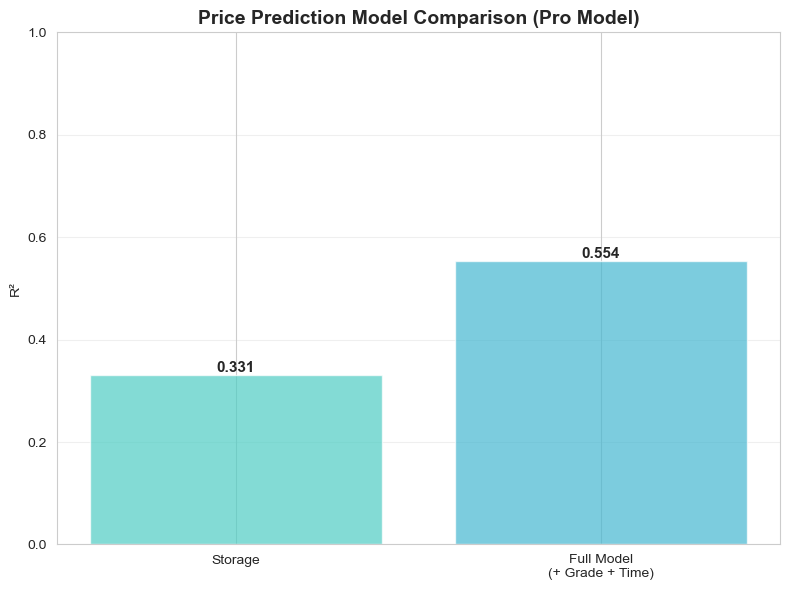


[Plot 12-2: Grade Classification Impact Summary]


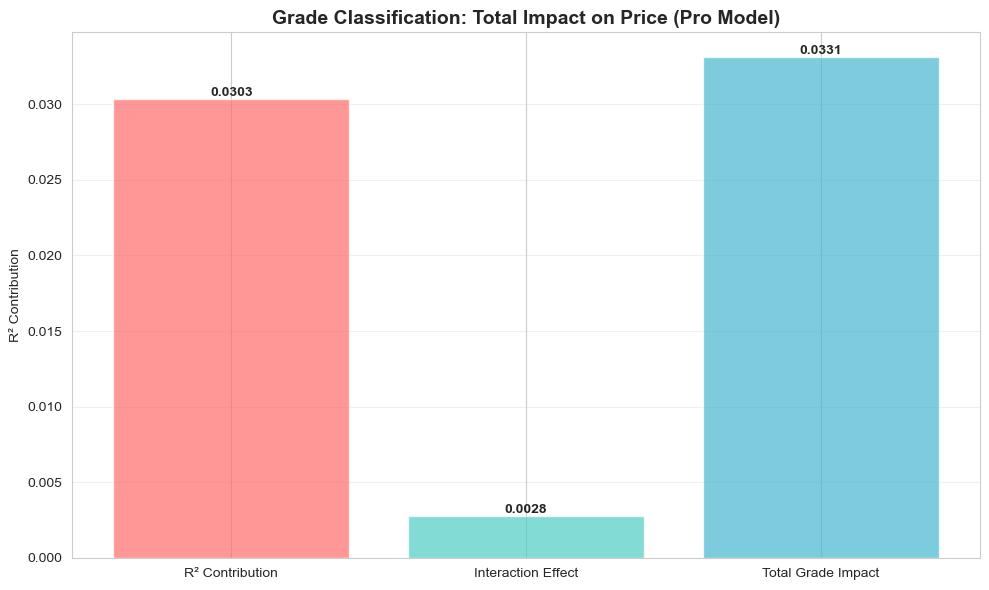


[Plot 12-3: Marketing Efficiency by Feature]


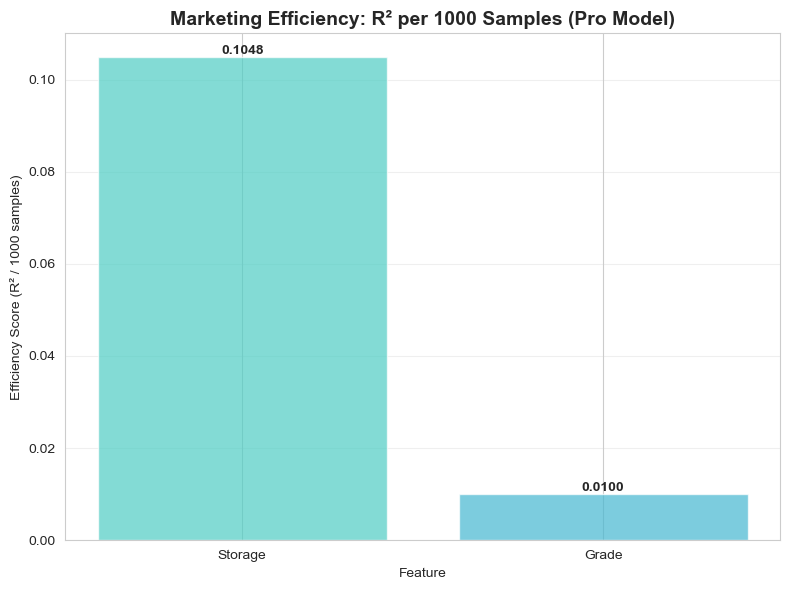


Practical Implications plots completed!


In [52]:
# ============================================================
# 12. Practical Implications - PPT Visualization
# ============================================================
print("="*60)
print("[12. Practical Implications - PPT Visualization]")
print("="*60)

# Filter to Pro model only (largest sample)
df_pro = df_all[df_all['final_model'] == 'Pro'].copy()
print(f"Pro model samples: {len(df_pro)} rows")
step2_df_storage = df_pro.dropna(subset=['final_storage']).copy()

# Plot 12-1: Price Prediction Model Comparison (Model + Storage vs Full Model)
print("\n[Plot 12-1: Price Prediction Model Comparison]")
# Simple model (Storage only for Pro model)
simple_pred_model = smf.ols('price ~ final_storage', data=step2_df_storage).fit()
# Full model (Storage + Grade + Time)
full_pred_model = smf.ols(
    'price ~ final_storage + C(prompt_grade) + weeks_since_launch',
    data=step2_df_storage
).fit()

models_comparison = {
    'Storage': simple_pred_model.rsquared,
    'Full Model\n(+ Grade + Time)': full_pred_model.rsquared
}

plt.figure(figsize=(8, 6))
bars = plt.bar(models_comparison.keys(), models_comparison.values(), 
               color=['#4ECDC4', '#45B7D1'], alpha=0.7)
plt.title('Price Prediction Model Comparison (Pro Model)', fontsize=14, fontweight='bold')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')
for bar, (model, r2) in zip(bars, models_comparison.items()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{r2:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

# Plot 12-2: Grade Classification Impact Summary
print("\n[Plot 12-2: Grade Classification Impact Summary]")
# Recalculate contributions
base_model = smf.ols('price ~ weeks_since_launch', data=step2_df_storage).fit()
base_r2 = base_model.rsquared
factors = {
    'Base (Time)': base_r2,
    '+ Storage': smf.ols('price ~ weeks_since_launch + final_storage', data=step2_df_storage).fit().rsquared,
    '+ Grade': smf.ols('price ~ weeks_since_launch + final_storage + C(prompt_grade)', data=step2_df_storage).fit().rsquared,
}
contributions = {}
prev_r2 = base_r2
for factor, r2 in factors.items():
    if factor != 'Base (Time)':
        contributions[factor] = r2 - prev_r2
        prev_r2 = r2

# Recalculate grade interaction effect
time_grade_interaction = smf.ols(
    'price ~ C(prompt_grade) * weeks_since_launch + final_storage',
    data=step2_df_storage
).fit()
time_grade_no_interaction = smf.ols(
    'price ~ C(prompt_grade) + weeks_since_launch + final_storage',
    data=step2_df_storage
).fit()
grade_interaction_r2 = time_grade_interaction.rsquared - time_grade_no_interaction.rsquared

grade_impact_summary = {
    'R² Contribution': contributions.get('+ Grade', 0),
    'Interaction Effect': grade_interaction_r2,
    'Total Grade Impact': contributions.get('+ Grade', 0) + grade_interaction_r2
}

plt.figure(figsize=(10, 6))
bars = plt.bar(grade_impact_summary.keys(), grade_impact_summary.values(), 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.7)
plt.title('Grade Classification: Total Impact on Price (Pro Model)', fontsize=14, fontweight='bold')
plt.ylabel('R² Contribution')
plt.grid(True, alpha=0.3, axis='y')
for bar, (key, val) in zip(bars, grade_impact_summary.items()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

# Plot 12-3: Marketing Efficiency (Feature ROI Concept)
print("\n[Plot 12-3: Marketing Efficiency by Feature]")
# R² contribution vs sample size (efficiency metric)
feature_efficiency = {
    'Storage': (contributions.get('+ Storage', 0), len(step2_df_storage)),
    'Grade': (contributions.get('+ Grade', 0), len(step2_df_storage))
}

efficiency_scores = {k: v[0] / (v[1] / 1000) for k, v in feature_efficiency.items()}  # R² per 1000 samples

plt.figure(figsize=(8, 6))
bars = plt.bar(efficiency_scores.keys(), efficiency_scores.values(), 
               color=['#4ECDC4', '#45B7D1'], alpha=0.7)
plt.title('Marketing Efficiency: R² per 1000 Samples (Pro Model)', fontsize=14, fontweight='bold')
plt.xlabel('Feature')
plt.ylabel('Efficiency Score (R² / 1000 samples)')
plt.grid(True, alpha=0.3, axis='y')
for bar, (key, val) in zip(bars, efficiency_scores.items()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

print("\nPractical Implications plots completed!")
